<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/Weight_Initialization_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.4 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-ig9g7ynq
  Entered build tracker: /tmp/pip-build-tracker-ig9g7ynq
  Created temporary directory: /tmp/pip-install-0plwp1ju
  Created temporary directory: /tmp/pip-ephem-wheel-cache-vn8f4be0
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.0 MB/s eta 0:00:00


In [7]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [8]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [9]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.87, -8.43, -6.52, -4.21, -1.53, 0.54, 1.29, 2.05, 2.76, 3.47, 4.18, 4.89, 5.6, 6.31, 7.02, 7.73, 8.44, 9.15, 9.86]


In [10]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):
    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax

    particles = []

    for _ in range(nPop):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']
        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

        if(it <= 20):
          prompt = f"Generate a positive number a little lower than {w} and greater then 0.1 using Normalised Glorot Initialization. Don't write anything else, just write that number in decimal notation normally."
          w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

          USER: {prompt}

          ASSISTANT:
          '''

          w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                                repeat_penalty=1.2, top_k=150, echo=True)

          text_response = w_response['choices'][0]['text']
          value = re.findall(r'-?\d+\.\d+', text_response)
          value = [float(num) for num in value]

          if value:
              w = value[-1]
              print(f"w{it+1} = {w}")
          else:
              print("Warning: LLM failed to provide a valid weight. Retaining previous weight.")

          w_values.append(w)
          g_values.append(GlobalBest['Cost'])

        else:
          w *= wdamp

          w_values.append(w)
          g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [11]:
# def sphere(x):
#     return sum(x**2)

In [12]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [14]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [15]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [16]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [17]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [18]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [19]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [20]:
costs = []
errors = []

In [21]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [22]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

<ipython-input-13-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-10-2d427eabae00>:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']
Llama.generate: prefix-match hit


Iteration 1: Best Cost = 76783.96096017897
w1 = 0.23456789
Iteration 2: Best Cost = 57573.2259202419


Llama.generate: prefix-match hit


w2 = 0.225
Iteration 3: Best Cost = 38954.72580311279


Llama.generate: prefix-match hit


w3 = 0.209
Iteration 4: Best Cost = 29354.265106690662


Llama.generate: prefix-match hit


w4 = 0.185
Iteration 5: Best Cost = 24392.881951780473


Llama.generate: prefix-match hit


w5 = 0.172
Iteration 6: Best Cost = 13253.713723919751


Llama.generate: prefix-match hit


w6 = 0.159
Iteration 7: Best Cost = 10612.16867320774


Llama.generate: prefix-match hit


w7 = 0.148
Iteration 8: Best Cost = 6470.97089276555


Llama.generate: prefix-match hit


w8 = 0.135
Iteration 9: Best Cost = 4490.609134234171


Llama.generate: prefix-match hit


w9 = 0.129
Iteration 10: Best Cost = 4163.061522058752


Llama.generate: prefix-match hit


w10 = 0.124
Iteration 11: Best Cost = 4163.061522058752


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 2173.757408087634


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 1591.1090783259372


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = 1198.1813162085707


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = 1067.9734298047895


Llama.generate: prefix-match hit


w15 = 0.093
Iteration 16: Best Cost = 1067.9734298047895


Llama.generate: prefix-match hit


w16 = 0.084
Iteration 17: Best Cost = 738.9263363297116


Llama.generate: prefix-match hit


w17 = 0.096
Iteration 18: Best Cost = -50.34745644595887


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = -232.8598255864448


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -232.8598255864448


Llama.generate: prefix-match hit


w20 = 0.065
Iteration 21: Best Cost = -516.8467275725715


Llama.generate: prefix-match hit


w21 = 0.072
Iteration 22: Best Cost = -516.8467275725715
Iteration 23: Best Cost = -516.8467275725715
Iteration 24: Best Cost = -522.5476340352996
Iteration 25: Best Cost = -609.2967768836986
Iteration 26: Best Cost = -650.5651171380237
Iteration 27: Best Cost = -715.8457574336353
Iteration 28: Best Cost = -763.8481201093059
Iteration 29: Best Cost = -782.1270683233283
Iteration 30: Best Cost = -787.3707790100875
Iteration 31: Best Cost = -787.3707790100875
Iteration 32: Best Cost = -804.0418176818931
Iteration 33: Best Cost = -804.0418176818931
Iteration 34: Best Cost = -804.0418176818931
Iteration 35: Best Cost = -818.2214570377282
Iteration 36: Best Cost = -836.380982454803
Iteration 37: Best Cost = -836.380982454803
Iteration 38: Best Cost = -836.380982454803
Iteration 39: Best Cost = -836.380982454803
Iteration 40: Best Cost = -836.380982454803
Iteration 41: Best Cost = -895.8803448728149
Iteration 42: Best Cost = -897.9891821298284
Iteration 43: Best Cost = -897.9891821298284
Ite

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = -701.421384793425


Llama.generate: prefix-match hit


w2 = 0.22
Iteration 3: Best Cost = -701.4426779818782


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = -701.4574723582588


Llama.generate: prefix-match hit


w4 = 0.17
Iteration 5: Best Cost = -701.4827419233942


Llama.generate: prefix-match hit


w5 = 0.159
Iteration 6: Best Cost = -701.5009017211461


Llama.generate: prefix-match hit


w6 = 0.134
Iteration 7: Best Cost = -701.5283891517821


Llama.generate: prefix-match hit


w7 = 0.127
Iteration 8: Best Cost = -701.535418532749


Llama.generate: prefix-match hit


w8 = 0.119
Iteration 9: Best Cost = -701.5458763497645


Llama.generate: prefix-match hit


w9 = 0.108
Iteration 10: Best Cost = -701.5727135642414


Llama.generate: prefix-match hit


w10 = 0.095
Iteration 11: Best Cost = -701.597124415417


Llama.generate: prefix-match hit


w11 = 0.087
Iteration 12: Best Cost = -701.6001586779568


Llama.generate: prefix-match hit


w12 = 0.093
Iteration 13: Best Cost = -701.6125029265639


Llama.generate: prefix-match hit


w13 = 0.087
Iteration 14: Best Cost = -701.6280970492661


Llama.generate: prefix-match hit


w14 = 0.092
Iteration 15: Best Cost = -701.6433916337392


Llama.generate: prefix-match hit


w15 = 0.084
Iteration 16: Best Cost = -701.6433916337392


Llama.generate: prefix-match hit


w16 = 0.095
Iteration 17: Best Cost = -701.6589755391441


Llama.generate: prefix-match hit


w17 = 0.087
Iteration 18: Best Cost = -701.685376646443


Llama.generate: prefix-match hit


w18 = 0.092
Iteration 19: Best Cost = -701.6926200260424


Llama.generate: prefix-match hit


w19 = 0.085
Iteration 20: Best Cost = -701.6991885794905


Llama.generate: prefix-match hit


w20 = 0.092
Iteration 21: Best Cost = -701.7071401434874


Llama.generate: prefix-match hit


w21 = 0.084
Iteration 22: Best Cost = -701.7154310501384
Iteration 23: Best Cost = -701.7211035134927
Iteration 24: Best Cost = -701.7326858836329
Iteration 25: Best Cost = -701.7326858836329
Iteration 26: Best Cost = -701.7420172219458
Iteration 27: Best Cost = -701.7539377417993
Iteration 28: Best Cost = -701.7554748322297
Iteration 29: Best Cost = -701.762539462698
Iteration 30: Best Cost = -701.762539462698
Iteration 31: Best Cost = -701.762539462698
Iteration 32: Best Cost = -701.762539462698
Iteration 33: Best Cost = -701.7684953505245
Iteration 34: Best Cost = -701.7765830126286
Iteration 35: Best Cost = -701.7906357272086
Iteration 36: Best Cost = -701.7906357272086
Iteration 37: Best Cost = -701.7906357272086
Iteration 38: Best Cost = -701.8084982369138
Iteration 39: Best Cost = -701.8179857466326
Iteration 40: Best Cost = -701.8179857466326
Iteration 41: Best Cost = -701.8442153289473
Iteration 42: Best Cost = -701.8442153289473
Iteration 43: Best Cost = -701.844843653303
Ite

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 26240548907.207508


Llama.generate: prefix-match hit


w2 = 0.234
Iteration 3: Best Cost = 23301172651.944695


Llama.generate: prefix-match hit


w3 = 0.217
Iteration 4: Best Cost = 20538490673.95695


Llama.generate: prefix-match hit


w4 = 0.195
Iteration 5: Best Cost = 13232795337.166107


Llama.generate: prefix-match hit


w5 = 0.178
Iteration 6: Best Cost = 9945282241.853828


Llama.generate: prefix-match hit


w6 = 0.164
Iteration 7: Best Cost = 7365952579.504371


Llama.generate: prefix-match hit


w7 = 0.158
Iteration 8: Best Cost = 6355118663.697003


Llama.generate: prefix-match hit


w8 = 0.142
Iteration 9: Best Cost = 6355118663.697003


Llama.generate: prefix-match hit


w9 = 0.135
Iteration 10: Best Cost = 5601747199.745214


Llama.generate: prefix-match hit


w10 = 0.127
Iteration 11: Best Cost = 3426739835.4936733


Llama.generate: prefix-match hit


w11 = 0.119
Iteration 12: Best Cost = 3136508480.9517198


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 2827763243.644129


Llama.generate: prefix-match hit


w13 = 0.104
Iteration 14: Best Cost = 2385411888.9092045


Llama.generate: prefix-match hit


w14 = 0.097
Iteration 15: Best Cost = 1878974160.1519587


Llama.generate: prefix-match hit


w15 = 0.085
Iteration 16: Best Cost = 1799159797.5236318


Llama.generate: prefix-match hit


w16 = 0.079
Iteration 17: Best Cost = 1343465416.928298


Llama.generate: prefix-match hit


w17 = 0.064
Iteration 18: Best Cost = 1216652093.6568596


Llama.generate: prefix-match hit


w18 = 0.057
Iteration 19: Best Cost = 1028224415.2534429


Llama.generate: prefix-match hit


w19 = 0.043
Iteration 20: Best Cost = 873307206.7963859


Llama.generate: prefix-match hit


w20 = 0.039
Iteration 21: Best Cost = 873307206.7963859


Llama.generate: prefix-match hit


w21 = 0.028
Iteration 22: Best Cost = 853420457.0063452
Iteration 23: Best Cost = 646991471.5836056
Iteration 24: Best Cost = 547381451.7795548
Iteration 25: Best Cost = 496101091.42402405
Iteration 26: Best Cost = 423838432.28946435
Iteration 27: Best Cost = 381101250.3665559
Iteration 28: Best Cost = 381101250.3665559
Iteration 29: Best Cost = 381101250.3665559
Iteration 30: Best Cost = 381101250.3665559
Iteration 31: Best Cost = 316318232.3169435
Iteration 32: Best Cost = 316318232.3169435
Iteration 33: Best Cost = 293810513.884329
Iteration 34: Best Cost = 293810513.884329
Iteration 35: Best Cost = 260979277.22423652
Iteration 36: Best Cost = 254717216.15081733
Iteration 37: Best Cost = 230567679.14963844
Iteration 38: Best Cost = 228910137.17666066
Iteration 39: Best Cost = 187717774.02440876
Iteration 40: Best Cost = 145723699.85908446
Iteration 41: Best Cost = 145723699.85908446
Iteration 42: Best Cost = 132055049.67162694
Iteration 43: Best Cost = 132055049.67162694
Iteration 4

Llama.generate: prefix-match hit


w1 = 0.275348693216129
Iteration 2: Best Cost = 253027.62508702834


Llama.generate: prefix-match hit


w2 = 0.263792675248258
Iteration 3: Best Cost = 206723.80818182556


Llama.generate: prefix-match hit


w3 = 0.248258
Iteration 4: Best Cost = 175088.57453590014


Llama.generate: prefix-match hit


w4 = 0.239677
Iteration 5: Best Cost = 135915.01252618394


Llama.generate: prefix-match hit


w5 = 0.218548
Iteration 6: Best Cost = 102815.82627400785


Llama.generate: prefix-match hit


w6 = 0.193675
Iteration 7: Best Cost = 65206.34801143832


Llama.generate: prefix-match hit


w7 = 0.184239
Iteration 8: Best Cost = 58481.3401379675


Llama.generate: prefix-match hit


w8 = 0.175678
Iteration 9: Best Cost = 53996.59385381366


Llama.generate: prefix-match hit


w9 = 0.14329
Iteration 10: Best Cost = 42996.54854772168


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 38401.41090925648


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 30845.80997459701


Llama.generate: prefix-match hit


w12 = 0.109
Iteration 13: Best Cost = 30845.80997459701


Llama.generate: prefix-match hit


w13 = 0.085
Iteration 14: Best Cost = 23786.154638532204


Llama.generate: prefix-match hit


w14 = 0.079
Iteration 15: Best Cost = 19489.66995436383


Llama.generate: prefix-match hit


w15 = 0.068
Iteration 16: Best Cost = 15279.391666302618


Llama.generate: prefix-match hit


w16 = 0.074
Iteration 17: Best Cost = 15066.062838826367


Llama.generate: prefix-match hit


w17 = 0.065
Iteration 18: Best Cost = 11122.116587876544


Llama.generate: prefix-match hit


w18 = 0.043
Iteration 19: Best Cost = 10649.164878716527


Llama.generate: prefix-match hit


w19 = 0.075
Iteration 20: Best Cost = 5061.515535902515


Llama.generate: prefix-match hit


w20 = 0.0625
Iteration 21: Best Cost = 5061.515535902515


Llama.generate: prefix-match hit


w21 = 0.08375
Iteration 22: Best Cost = 5061.515535902515
Iteration 23: Best Cost = 5040.755836849899
Iteration 24: Best Cost = 4476.654414696216
Iteration 25: Best Cost = 3795.5863366720446
Iteration 26: Best Cost = 3307.4865203973072
Iteration 27: Best Cost = 3307.4865203973072
Iteration 28: Best Cost = 3307.4865203973072
Iteration 29: Best Cost = 2835.3865535021055
Iteration 30: Best Cost = 2835.3865535021055
Iteration 31: Best Cost = 1983.1274753738608
Iteration 32: Best Cost = 1983.1274753738608
Iteration 33: Best Cost = 1983.1274753738608
Iteration 34: Best Cost = 1957.2180877623518
Iteration 35: Best Cost = 1957.2180877623518
Iteration 36: Best Cost = 1758.6001324461163
Iteration 37: Best Cost = 1381.8734431790795
Iteration 38: Best Cost = 1338.6710640324545
Iteration 39: Best Cost = 1124.7285174776148
Iteration 40: Best Cost = 1124.7285174776148
Iteration 41: Best Cost = 1124.7285174776148
Iteration 42: Best Cost = 1124.7285174776148
Iteration 43: Best Cost = 787.2993291188203


Llama.generate: prefix-match hit


w1 = 0.374826159424242
Iteration 2: Best Cost = -334.20830660554554


Llama.generate: prefix-match hit


w2 = 0.294826159424242
Iteration 3: Best Cost = -334.2589000130068


Llama.generate: prefix-match hit


w3 = 0.2375
Iteration 4: Best Cost = -334.2915745318352


Llama.generate: prefix-match hit


w4 = 0.228
Iteration 5: Best Cost = -334.3507601540005


Llama.generate: prefix-match hit


w5 = 0.205
Iteration 6: Best Cost = -334.412085127219


Llama.generate: prefix-match hit


w6 = 0.187
Iteration 7: Best Cost = -334.4464612471362


Llama.generate: prefix-match hit


w7 = 0.169
Iteration 8: Best Cost = -334.4749993678966


Llama.generate: prefix-match hit


w8 = 0.157
Iteration 9: Best Cost = -334.4962186163734


Llama.generate: prefix-match hit


w9 = 0.143
Iteration 10: Best Cost = -334.5173316561302


Llama.generate: prefix-match hit


w10 = 0.127
Iteration 11: Best Cost = -334.5579194011067


Llama.generate: prefix-match hit


w11 = 0.119
Iteration 12: Best Cost = -334.56901375974013


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = -334.5923407391343


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = -334.64298654019757


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = -334.64298654019757


Llama.generate: prefix-match hit


w15 = 0.092
Iteration 16: Best Cost = -334.64298654019757


Llama.generate: prefix-match hit


w16 = 0.085
Iteration 17: Best Cost = -334.6531966146031


Llama.generate: prefix-match hit


w17 = 0.074
Iteration 18: Best Cost = -334.71030887087744


Llama.generate: prefix-match hit


w18 = 0.068
Iteration 19: Best Cost = -334.74706246881226


Llama.generate: prefix-match hit


w19 = 0.073
Iteration 20: Best Cost = -334.74706246881226


Llama.generate: prefix-match hit


w20 = 0.069
Iteration 21: Best Cost = -334.787437143694


Llama.generate: prefix-match hit


w21 = 0.058
Iteration 22: Best Cost = -334.78917320846585
Iteration 23: Best Cost = -334.78917320846585
Iteration 24: Best Cost = -334.78917320846585
Iteration 25: Best Cost = -334.79477537360185
Iteration 26: Best Cost = -334.8017808854385
Iteration 27: Best Cost = -334.81105886759883
Iteration 28: Best Cost = -334.81105886759883
Iteration 29: Best Cost = -334.81286203141184
Iteration 30: Best Cost = -334.8182187287681
Iteration 31: Best Cost = -334.8182187287681
Iteration 32: Best Cost = -334.8488667204439
Iteration 33: Best Cost = -334.8526451254329
Iteration 34: Best Cost = -334.85590187665883
Iteration 35: Best Cost = -334.85590187665883
Iteration 36: Best Cost = -334.86764378472907
Iteration 37: Best Cost = -334.8719127126467
Iteration 38: Best Cost = -334.8941078180268
Iteration 39: Best Cost = -334.8941078180268
Iteration 40: Best Cost = -334.8941078180268
Iteration 41: Best Cost = -334.8941078180268
Iteration 42: Best Cost = -334.8952059933485
Iteration 43: Best Cost = -334.90

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = -183.63425937030303


Llama.generate: prefix-match hit


w2 = 0.296272357142857
Iteration 3: Best Cost = -183.6809327077643


Llama.generate: prefix-match hit


w3 = 0.274278396272357
Iteration 4: Best Cost = -183.7136783583064


Llama.generate: prefix-match hit


w4 = 0.267179149509823
Iteration 5: Best Cost = -183.76534296303825


Llama.generate: prefix-match hit


w5 = 0.243179149509823
Iteration 6: Best Cost = -183.85813510794097


Llama.generate: prefix-match hit


w6 = 0.216273192146914
Iteration 7: Best Cost = -183.89442233454258


Llama.generate: prefix-match hit


w7 = 0.185736567658942
Iteration 8: Best Cost = -183.89442233454258


Llama.generate: prefix-match hit


w8 = 0.17399472901872
Iteration 9: Best Cost = -183.9072451206373


Llama.generate: prefix-match hit


w9 = 0.16595127939348
Iteration 10: Best Cost = -183.9210758232545


Llama.generate: prefix-match hit


w10 = 0.15857894736852
Iteration 11: Best Cost = -183.95364086724263


Llama.generate: prefix-match hit


w11 = 0.145123456789012
Iteration 12: Best Cost = -183.96650046866975


Llama.generate: prefix-match hit


w12 = 0.138123456789012
Iteration 13: Best Cost = -184.01862839989366


Llama.generate: prefix-match hit


w13 = 0.127890123456789
Iteration 14: Best Cost = -184.01862839989366


Llama.generate: prefix-match hit


w14 = 0.11923456789
Iteration 15: Best Cost = -184.02717898806162


Llama.generate: prefix-match hit


w15 = 0.11757894736
Iteration 16: Best Cost = -184.03046998965192


Llama.generate: prefix-match hit


w16 = 0.11257894736
Iteration 17: Best Cost = -184.03848341339705


Llama.generate: prefix-match hit


w17 = 0.10782553718
Iteration 18: Best Cost = -184.0983996797205


Llama.generate: prefix-match hit


w18 = 0.09465176445
Iteration 19: Best Cost = -184.0983996797205


Llama.generate: prefix-match hit


w19 = 0.08230372729
Iteration 20: Best Cost = -184.0983996797205


Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


w21 = 0.08273215225
Iteration 22: Best Cost = -184.11359614198284
Iteration 23: Best Cost = -184.1304244616264
Iteration 24: Best Cost = -184.14251642291524
Iteration 25: Best Cost = -184.15858275170675
Iteration 26: Best Cost = -184.18606668133543
Iteration 27: Best Cost = -184.20790239538283
Iteration 28: Best Cost = -184.21133745939184
Iteration 29: Best Cost = -184.2191903382647
Iteration 30: Best Cost = -184.2252066198018
Iteration 31: Best Cost = -184.2252066198018
Iteration 32: Best Cost = -184.2252066198018
Iteration 33: Best Cost = -184.22567743938046
Iteration 34: Best Cost = -184.2618890822467
Iteration 35: Best Cost = -184.2618890822467
Iteration 36: Best Cost = -184.2618890822467
Iteration 37: Best Cost = -184.2618890822467
Iteration 38: Best Cost = -184.2740035470005
Iteration 39: Best Cost = -184.2824526686845
Iteration 40: Best Cost = -184.2824526686845
Iteration 41: Best Cost = -184.3104323955771
Iteration 42: Best Cost = -184.3104323955771
Iteration 43: Best Cost = -1

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = 52718.98739929335


Llama.generate: prefix-match hit


w2 = 0.2894741
Iteration 3: Best Cost = 44549.111497521546


Llama.generate: prefix-match hit


w3 = 0.2653291
Iteration 4: Best Cost = 34235.895691333695


Llama.generate: prefix-match hit


w4 = 0.2478571
Iteration 5: Best Cost = 25480.268481033083


Llama.generate: prefix-match hit


w5 = 0.2396759
Iteration 6: Best Cost = 22302.59593945097


Llama.generate: prefix-match hit


w6 = 0.2346819
Iteration 7: Best Cost = 18078.422526128834


Llama.generate: prefix-match hit


w7 = 0.227525
Iteration 8: Best Cost = 10372.017838078722


Llama.generate: prefix-match hit


w8 = 0.218364
Iteration 9: Best Cost = 10372.017838078722


Llama.generate: prefix-match hit


w9 = 0.195768
Iteration 10: Best Cost = 10372.017838078722


Llama.generate: prefix-match hit


w10 = 0.173245
Iteration 11: Best Cost = 10372.017838078722


Llama.generate: prefix-match hit


w11 = 0.1689
Iteration 12: Best Cost = 10372.017838078722


Llama.generate: prefix-match hit


w12 = 0.1542
Iteration 13: Best Cost = 10372.017838078722


Llama.generate: prefix-match hit


w13 = 0.1376
Iteration 14: Best Cost = 9987.163669318634


Llama.generate: prefix-match hit


w14 = 0.1295
Iteration 15: Best Cost = 9851.225126323538


Llama.generate: prefix-match hit


w15 = 0.1176
Iteration 16: Best Cost = 9335.301792907161


Llama.generate: prefix-match hit


w16 = 0.1084
Iteration 17: Best Cost = 7353.9119162731495


Llama.generate: prefix-match hit


w17 = 0.0952
Iteration 18: Best Cost = 7353.9119162731495


Llama.generate: prefix-match hit


w18 = 0.0876
Iteration 19: Best Cost = 7353.9119162731495


Llama.generate: prefix-match hit


w19 = 0.0934
Iteration 20: Best Cost = 6916.44319210645


Llama.generate: prefix-match hit


w20 = 0.0876
Iteration 21: Best Cost = 6899.178880697784


Llama.generate: prefix-match hit


w21 = 0.0953
Iteration 22: Best Cost = 6639.959401842082
Iteration 23: Best Cost = 5282.367099158241
Iteration 24: Best Cost = 5282.367099158241
Iteration 25: Best Cost = 5282.367099158241
Iteration 26: Best Cost = 5282.367099158241
Iteration 27: Best Cost = 5282.367099158241
Iteration 28: Best Cost = 5282.367099158241
Iteration 29: Best Cost = 5012.460689734908
Iteration 30: Best Cost = 4906.776152270959
Iteration 31: Best Cost = 4199.001571631816
Iteration 32: Best Cost = 3527.089610461626
Iteration 33: Best Cost = 3068.3936426998016
Iteration 34: Best Cost = 3024.0113215835854
Iteration 35: Best Cost = 2560.9662477090096
Iteration 36: Best Cost = 2560.9662477090096
Iteration 37: Best Cost = 2288.3014706282684
Iteration 38: Best Cost = 2288.3014706282684
Iteration 39: Best Cost = 2288.3014706282684
Iteration 40: Best Cost = 2149.665506562722
Iteration 41: Best Cost = 2135.7831800056556
Iteration 42: Best Cost = 2135.7831800056556
Iteration 43: Best Cost = 2011.9681966601727
Iteration

Llama.generate: prefix-match hit


w1 = 0.275394
Iteration 2: Best Cost = 37269.31987225667


Llama.generate: prefix-match hit


w2 = 0.268391
Iteration 3: Best Cost = 35990.072337060985


Llama.generate: prefix-match hit


w3 = 0.257124
Iteration 4: Best Cost = 29602.515969450702


Llama.generate: prefix-match hit


w4 = 0.239876
Iteration 5: Best Cost = 20143.042822821386


Llama.generate: prefix-match hit


w5 = 0.224567
Iteration 6: Best Cost = 20143.042822821386


Llama.generate: prefix-match hit


w6 = 0.218937
Iteration 7: Best Cost = 19634.730689579876


Llama.generate: prefix-match hit


w7 = 0.195469
Iteration 8: Best Cost = 18354.552628352296


Llama.generate: prefix-match hit


w8 = 0.183279
Iteration 9: Best Cost = 18354.552628352296


Llama.generate: prefix-match hit


w9 = 0.165432
Iteration 10: Best Cost = 18354.552628352296


Llama.generate: prefix-match hit


w10 = 0.157829
Iteration 11: Best Cost = 16761.29938475084


Llama.generate: prefix-match hit


w11 = 0.134567
Iteration 12: Best Cost = 16761.29938475084


Llama.generate: prefix-match hit


w12 = 0.129843
Iteration 13: Best Cost = 16761.29938475084


Llama.generate: prefix-match hit


w13 = 0.117652
Iteration 14: Best Cost = 16761.29938475084


Llama.generate: prefix-match hit


w14 = 0.108493
Iteration 15: Best Cost = 16761.29938475084


Llama.generate: prefix-match hit


w15 = 0.097652
Iteration 16: Best Cost = 16761.29938475084


Llama.generate: prefix-match hit


w16 = 0.084375
Iteration 17: Best Cost = 15532.430474885214


Llama.generate: prefix-match hit


w17 = 0.096292
Iteration 18: Best Cost = 15210.406097121471


Llama.generate: prefix-match hit


w18 = 0.085734
Iteration 19: Best Cost = 15210.406097121471


Llama.generate: prefix-match hit


w19 = 0.092632
Iteration 20: Best Cost = 15210.406097121471


Llama.generate: prefix-match hit


w20 = 0.08457
Iteration 21: Best Cost = 15210.406097121471


Llama.generate: prefix-match hit


w21 = 0.0923
Iteration 22: Best Cost = 12998.641643805307
Iteration 23: Best Cost = 12998.641643805307
Iteration 24: Best Cost = 12342.944326395263
Iteration 25: Best Cost = 12342.944326395263
Iteration 26: Best Cost = 10629.897805214625
Iteration 27: Best Cost = 10629.897805214625
Iteration 28: Best Cost = 10629.897805214625
Iteration 29: Best Cost = 10629.897805214625
Iteration 30: Best Cost = 10629.897805214625
Iteration 31: Best Cost = 10629.897805214625
Iteration 32: Best Cost = 9209.249665693562
Iteration 33: Best Cost = 8310.087115990998
Iteration 34: Best Cost = 8310.087115990998
Iteration 35: Best Cost = 8105.174665131136
Iteration 36: Best Cost = 8105.174665131136
Iteration 37: Best Cost = 8105.174665131136
Iteration 38: Best Cost = 8105.174665131136
Iteration 39: Best Cost = 8105.174665131136
Iteration 40: Best Cost = 8105.174665131136
Iteration 41: Best Cost = 8105.174665131136
Iteration 42: Best Cost = 8105.174665131136
Iteration 43: Best Cost = 8105.174665131136
Iteration

Llama.generate: prefix-match hit


w1 = 0.23456789
Iteration 2: Best Cost = 76396.18094901732


Llama.generate: prefix-match hit


w2 = 0.22456789
Iteration 3: Best Cost = 76396.18094901732


Llama.generate: prefix-match hit


w3 = 0.21345678
Iteration 4: Best Cost = 76396.18094901732


Llama.generate: prefix-match hit


w4 = 0.19542768
Iteration 5: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w5 = 0.17357143
Iteration 6: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w6 = 0.16892464
Iteration 7: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w7 = 0.15732386
Iteration 8: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w8 = 0.1496075
Iteration 9: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w9 = 0.1382549
Iteration 10: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w10 = 0.1276228
Iteration 11: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w11 = 0.1193456
Iteration 12: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w12 = 0.1187212
Iteration 13: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w13 = 0.1094365
Iteration 14: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w14 = 0.1087273
Iteration 15: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w15 = 0.1069548
Iteration 16: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w16 = 0.1032789
Iteration 17: Best Cost = 39208.10811412326


Llama.generate: prefix-match hit


w17 = 0.0956474
Iteration 18: Best Cost = 31934.313373994893


Llama.generate: prefix-match hit


w18 = 0.0873243
Iteration 19: Best Cost = 31934.313373994893


Llama.generate: prefix-match hit


w19 = 0.0695741
Iteration 20: Best Cost = 31934.313373994893


Llama.generate: prefix-match hit


w20 = 0.083271
Iteration 21: Best Cost = 31934.313373994893


Llama.generate: prefix-match hit


w21 = 0.095462
Iteration 22: Best Cost = 29521.92507238194
Iteration 23: Best Cost = 29521.92507238194
Iteration 24: Best Cost = 19927.90578954839
Iteration 25: Best Cost = 16563.10620312958
Iteration 26: Best Cost = 16563.10620312958
Iteration 27: Best Cost = 16563.10620312958
Iteration 28: Best Cost = 16563.10620312958
Iteration 29: Best Cost = 16563.10620312958
Iteration 30: Best Cost = 16563.10620312958
Iteration 31: Best Cost = 16563.10620312958
Iteration 32: Best Cost = 16563.10620312958Iteration 70: Best Cost = 1517.8879386633857
Iteration 71: Best Cost = 1517.8879386633857
Iteration 72: Best Cost = 1517.8879386633857
Iteration 73: Best Cost = 1517.8879386633857
Iteration 74: Best Cost = 1517.8879386633857
Iteration 75: Best Cost = 1517.8879386633857
Iteration 76: Best Cost = 1517.8879386633857
Iteration 77: Best Cost = 1517.8879386633857
Iteration 78: Best Cost = 1517.8879386633857
Iteration 79: Best Cost = 1517.8879386633857
Iteration 80: Best Cost = 1517.8879386633857
Iterati

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = 40355.471263533036


Llama.generate: prefix-match hit


w2 = 0.296543580835536
Iteration 3: Best Cost = 38816.7533208305


Llama.generate: prefix-match hit


w3 = 0.276543280835536
Iteration 4: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w4 = 0.269578947368549
Iteration 5: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w5 = 0.245476543211164
Iteration 6: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w6 = 0.218927037037037
Iteration 7: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w7 = 0.1645266089526609
Iteration 8: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w8 = 0.1573204285714286
Iteration 9: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w9 = 0.1459285714285714
Iteration 10: Best Cost = 24889.142299585634


Llama.generate: prefix-match hit


w10 = 0.1364270498557143
Iteration 11: Best Cost = 24123.684787670594


Llama.generate: prefix-match hit


w11 = 0.1284271698557143
Iteration 12: Best Cost = 22866.215964255265


Llama.generate: prefix-match hit


w12 = 0.1198270205126952
Iteration 13: Best Cost = 22866.215964255265


Llama.generate: prefix-match hit


w13 = 0.113456789
Iteration 14: Best Cost = 19037.44951034426


Llama.generate: prefix-match hit


w14 = 0.1023456789
Iteration 15: Best Cost = 18675.76660694823


Llama.generate: prefix-match hit


w15 = 0.0984765432
Iteration 16: Best Cost = 18380.088819477263


Llama.generate: prefix-match hit


w16 = 0.0892755379
Iteration 17: Best Cost = 16878.487594888196


Llama.generate: prefix-match hit


w17 = 0.0645626174
Iteration 18: Best Cost = 15096.691488152415


Llama.generate: prefix-match hit


w18 = 0.0593858538
Iteration 19: Best Cost = 10734.756943886905


Llama.generate: prefix-match hit


w19 = 0.0526478737
Iteration 20: Best Cost = 10734.756943886905


Llama.generate: prefix-match hit


w20 = 0.0495269467
Iteration 21: Best Cost = 10734.756943886905


Llama.generate: prefix-match hit


w21 = 0.0387605222
Iteration 22: Best Cost = 10734.756943886905
Iteration 23: Best Cost = 9820.139247188035
Iteration 24: Best Cost = 9820.139247188035
Iteration 25: Best Cost = 8113.394209518945
Iteration 26: Best Cost = 8113.394209518945
Iteration 27: Best Cost = 7910.633251997189
Iteration 28: Best Cost = 7910.633251997189
Iteration 29: Best Cost = 7694.096386611443
Iteration 30: Best Cost = 7694.096386611443
Iteration 31: Best Cost = 7694.096386611443
Iteration 32: Best Cost = 7694.096386611443
Iteration 33: Best Cost = 7261.113686140067
Iteration 34: Best Cost = 7261.113686140067
Iteration 35: Best Cost = 7261.113686140067
Iteration 36: Best Cost = 7261.113686140067
Iteration 37: Best Cost = 7261.113686140067
Iteration 38: Best Cost = 6365.101759596552
Iteration 39: Best Cost = 5604.7798184960275
Iteration 40: Best Cost = 5604.7798184960275
Iteration 41: Best Cost = 5604.7798184960275
Iteration 42: Best Cost = 5604.7798184960275
Iteration 43: Best Cost = 5604.7798184960275
Iterati

Llama.generate: prefix-match hit


w1 = 0.45
Iteration 2: Best Cost = 46416.91445594641


Llama.generate: prefix-match hit


w2 = 0.32
Iteration 3: Best Cost = 34307.72766669158


Llama.generate: prefix-match hit


w3 = 0.28
Iteration 4: Best Cost = 31026.17938183682


Llama.generate: prefix-match hit


w4 = 0.245
Iteration 5: Best Cost = 26663.991806153455


Llama.generate: prefix-match hit


w5 = 0.238
Iteration 6: Best Cost = 20292.631002625647


Llama.generate: prefix-match hit


w6 = 0.214
Iteration 7: Best Cost = 14317.821987834093


Llama.generate: prefix-match hit


w7 = 0.185
Iteration 8: Best Cost = 14317.821987834093


Llama.generate: prefix-match hit


w8 = 0.173
Iteration 9: Best Cost = 14317.821987834093


Llama.generate: prefix-match hit


w9 = 0.154
Iteration 10: Best Cost = 14317.821987834093


Llama.generate: prefix-match hit


w10 = 0.139
Iteration 11: Best Cost = 10166.19916620412


Llama.generate: prefix-match hit


w11 = 0.127
Iteration 12: Best Cost = 9566.28571554919


Llama.generate: prefix-match hit


w12 = 0.119
Iteration 13: Best Cost = 8577.298301475275


Llama.generate: prefix-match hit


w13 = 0.108
Iteration 14: Best Cost = 7714.757602339852


Llama.generate: prefix-match hit


w14 = 0.095
Iteration 15: Best Cost = 7714.757602339852


Llama.generate: prefix-match hit


w15 = 0.087
Iteration 16: Best Cost = 7423.446895563602


Llama.generate: prefix-match hit


w16 = 0.092
Iteration 17: Best Cost = 6379.085461219433


Llama.generate: prefix-match hit


w17 = 0.084
Iteration 18: Best Cost = 6379.085461219433


Llama.generate: prefix-match hit


w18 = 0.097
Iteration 19: Best Cost = 6379.085461219433


Llama.generate: prefix-match hit


w19 = 0.084
Iteration 20: Best Cost = 6379.085461219433


Llama.generate: prefix-match hit


w20 = 0.095
Iteration 21: Best Cost = 6379.085461219433


Llama.generate: prefix-match hit


w21 = 0.087
Iteration 22: Best Cost = 6379.085461219433
Iteration 23: Best Cost = 6051.129826960822
Iteration 24: Best Cost = 5317.195861332004
Iteration 25: Best Cost = 5317.195861332004
Iteration 26: Best Cost = 4464.119758872064
Iteration 27: Best Cost = 4464.119758872064
Iteration 28: Best Cost = 3684.5347310163643
Iteration 29: Best Cost = 3684.5347310163643
Iteration 30: Best Cost = 3684.5347310163643
Iteration 31: Best Cost = 3684.5347310163643
Iteration 32: Best Cost = 3684.5347310163643
Iteration 33: Best Cost = 3684.5347310163643
Iteration 34: Best Cost = 3544.6691167604267
Iteration 35: Best Cost = 3461.5995927930326
Iteration 36: Best Cost = 3153.220694722828
Iteration 37: Best Cost = 3039.970958220146
Iteration 38: Best Cost = 2330.189536609143
Iteration 39: Best Cost = 2330.189536609143
Iteration 40: Best Cost = 2330.189536609143
Iteration 41: Best Cost = 2330.189536609143
Iteration 42: Best Cost = 2330.189536609143
Iteration 43: Best Cost = 2237.0835648751836
Iteration 4

Llama.generate: prefix-match hit


w1 = 0.42
Iteration 2: Best Cost = 50066.64119276081


Llama.generate: prefix-match hit


w2 = 0.35
Iteration 3: Best Cost = 34007.49090048392


Llama.generate: prefix-match hit


w3 = 0.28
Iteration 4: Best Cost = 34007.49090048392


Llama.generate: prefix-match hit


w4 = 0.245679
Iteration 5: Best Cost = 30736.849705886696


Llama.generate: prefix-match hit


w5 = 0.238271
Iteration 6: Best Cost = 27115.71158727225


Llama.generate: prefix-match hit


w6 = 0.224569
Iteration 7: Best Cost = 27115.71158727225


Llama.generate: prefix-match hit


w7 = 0.217384
Iteration 8: Best Cost = 27115.71158727225


Llama.generate: prefix-match hit


w8 = 0.195631
Iteration 9: Best Cost = 27115.71158727225


Llama.generate: prefix-match hit


w9 = 0.184729
Iteration 10: Best Cost = 25544.2889993943


Llama.generate: prefix-match hit


w10 = 0.165322
Iteration 11: Best Cost = 25544.2889993943


Llama.generate: prefix-match hit


w11 = 0.149876
Iteration 12: Best Cost = 21016.379660062936


Llama.generate: prefix-match hit


w12 = 0.135254
Iteration 13: Best Cost = 21016.379660062936


Llama.generate: prefix-match hit


w13 = 0.128679
Iteration 14: Best Cost = 21016.379660062936


Llama.generate: prefix-match hit


w14 = 0.123456
Iteration 15: Best Cost = 21016.379660062936


Llama.generate: prefix-match hit


w15 = 0.117986
Iteration 16: Best Cost = 21016.379660062936


Llama.generate: prefix-match hit


w16 = 0.104325
Iteration 17: Best Cost = 18950.617553129257


Llama.generate: prefix-match hit


w17 = 0.102879
Iteration 18: Best Cost = 18268.1444772203


Llama.generate: prefix-match hit


w18 = 0.095644
Iteration 19: Best Cost = 17159.886108488052


Llama.generate: prefix-match hit


w19 = 0.087321
Iteration 20: Best Cost = 17159.886108488052


Llama.generate: prefix-match hit


w20 = 0.094567
Iteration 21: Best Cost = 17159.886108488052


Llama.generate: prefix-match hit


w21 = 0.087234
Iteration 22: Best Cost = 17107.3043997327
Iteration 23: Best Cost = 17107.3043997327
Iteration 24: Best Cost = 16648.826663141605
Iteration 25: Best Cost = 16648.826663141605
Iteration 26: Best Cost = 16648.826663141605
Iteration 27: Best Cost = 15577.43824824705
Iteration 28: Best Cost = 15535.045814363908
Iteration 29: Best Cost = 13688.500849707449
Iteration 30: Best Cost = 13192.609675012704
Iteration 31: Best Cost = 13192.609675012704
Iteration 32: Best Cost = 13192.609675012704
Iteration 33: Best Cost = 11708.238701313827
Iteration 34: Best Cost = 11708.238701313827
Iteration 35: Best Cost = 11708.238701313827
Iteration 36: Best Cost = 11708.238701313827
Iteration 37: Best Cost = 11708.238701313827
Iteration 38: Best Cost = 11708.238701313827
Iteration 39: Best Cost = 11381.734972519456
Iteration 40: Best Cost = 11381.734972519456
Iteration 41: Best Cost = 10441.21217460145
Iteration 42: Best Cost = 10441.21217460145
Iteration 43: Best Cost = 10441.21217460145
Ite

Llama.generate: prefix-match hit


w1 = 0.275436986720889
Iteration 2: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w2 = 0.262436986720888
Iteration 3: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w3 = 0.255435894370306
Iteration 4: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w4 = 0.245320781877597
Iteration 5: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w5 = 0.236190426598309
Iteration 6: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w6 = 0.227380690598428
Iteration 7: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w7 = 0.208650107327816
Iteration 8: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w8 = 0.19477253125
Iteration 9: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w9 = 0.1864788515625
Iteration 10: Best Cost = 121126.94393131371


Llama.generate: prefix-match hit


w10 = 0.1793928535244
Iteration 11: Best Cost = 102438.56916121888


Llama.generate: prefix-match hit


w11 = 0.1694257879056
Iteration 12: Best Cost = 102438.56916121888


Llama.generate: prefix-match hit


w12 = 0.153728453977
Iteration 13: Best Cost = 89588.02767001922


Llama.generate: prefix-match hit


w13 = 0.123456789
Iteration 14: Best Cost = 89588.02767001922


Llama.generate: prefix-match hit


w14 = 0.1176470589
Iteration 15: Best Cost = 89588.02767001922


Llama.generate: prefix-match hit


w15 = 0.1082345679
Iteration 16: Best Cost = 67734.89060732945


Llama.generate: prefix-match hit


w16 = 0.1074265359
Iteration 17: Best Cost = 62952.289259448924


Llama.generate: prefix-match hit


w17 = 0.0984265359
Iteration 18: Best Cost = 62952.289259448924


Llama.generate: prefix-match hit


w18 = 0.0878265359
Iteration 19: Best Cost = 62952.289259448924


Llama.generate: prefix-match hit


w19 = 0.0745286859
Iteration 20: Best Cost = 62952.289259448924


Llama.generate: prefix-match hit


w20 = 0.053125
Iteration 21: Best Cost = 62952.289259448924


Llama.generate: prefix-match hit


w21 = 0.047689
Iteration 22: Best Cost = 62952.289259448924
Iteration 23: Best Cost = 62952.289259448924
Iteration 24: Best Cost = 62952.289259448924
Iteration 25: Best Cost = 62952.289259448924
Iteration 26: Best Cost = 62952.289259448924
Iteration 27: Best Cost = 62952.289259448924
Iteration 28: Best Cost = 62952.289259448924
Iteration 29: Best Cost = 62952.289259448924
Iteration 30: Best Cost = 62952.289259448924
Iteration 31: Best Cost = 62952.289259448924
Iteration 32: Best Cost = 62952.289259448924
Iteration 33: Best Cost = 62952.289259448924
Iteration 34: Best Cost = 62952.289259448924
Iteration 35: Best Cost = 62952.289259448924
Iteration 36: Best Cost = 62952.289259448924
Iteration 37: Best Cost = 62952.289259448924
Iteration 38: Best Cost = 62952.289259448924
Iteration 39: Best Cost = 54967.127510223254
Iteration 40: Best Cost = 54967.127510223254
Iteration 41: Best Cost = 54967.127510223254
Iteration 42: Best Cost = 54967.127510223254
Iteration 43: Best Cost = 54967.12751022

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = 28299.088589884304


Llama.generate: prefix-match hit


w2 = 0.296875
Iteration 3: Best Cost = 20834.815880893726


Llama.generate: prefix-match hit


w3 = 0.234567
Iteration 4: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w4 = 0.229876
Iteration 5: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w5 = 0.204359
Iteration 6: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w6 = 0.187623
Iteration 7: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w7 = 0.17594
Iteration 8: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w8 = 0.16823
Iteration 9: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w9 = 0.15749
Iteration 10: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w10 = 0.123456
Iteration 11: Best Cost = 20392.99555909149


Llama.generate: prefix-match hit


w11 = 0.117987
Iteration 12: Best Cost = 18492.22839640215


Llama.generate: prefix-match hit


w12 = 0.115234
Iteration 13: Best Cost = 18492.22839640215


Llama.generate: prefix-match hit


w13 = 0.111678
Iteration 14: Best Cost = 17076.25146095383


Llama.generate: prefix-match hit


w14 = 0.109423
Iteration 15: Best Cost = 17076.25146095383


Llama.generate: prefix-match hit


w15 = 0.098765
Iteration 16: Best Cost = 17076.25146095383


Llama.generate: prefix-match hit


w16 = 0.082345
Iteration 17: Best Cost = 16356.348822725877


Llama.generate: prefix-match hit


w17 = 0.097654
Iteration 18: Best Cost = 16356.348822725877


Llama.generate: prefix-match hit


w18 = 0.083274
Iteration 19: Best Cost = 16356.348822725877


Llama.generate: prefix-match hit


w19 = 0.065927
Iteration 20: Best Cost = 16356.348822725877


Llama.generate: prefix-match hit


w20 = 0.053846
Iteration 21: Best Cost = 16356.348822725877


Llama.generate: prefix-match hit


w21 = 0.072976
Iteration 22: Best Cost = 16356.348822725877
Iteration 23: Best Cost = 16327.320160182246
Iteration 24: Best Cost = 16327.320160182246
Iteration 25: Best Cost = 15317.038025292657
Iteration 26: Best Cost = 15317.038025292657
Iteration 27: Best Cost = 15317.038025292657
Iteration 28: Best Cost = 15317.038025292657
Iteration 29: Best Cost = 15317.038025292657
Iteration 30: Best Cost = 15317.038025292657
Iteration 31: Best Cost = 15317.038025292657
Iteration 32: Best Cost = 15317.038025292657
Iteration 33: Best Cost = 15317.038025292657
Iteration 34: Best Cost = 15317.038025292657
Iteration 35: Best Cost = 14988.410333200321
Iteration 36: Best Cost = 14955.053381914522
Iteration 37: Best Cost = 13603.261695541549
Iteration 38: Best Cost = 13603.261695541549
Iteration 39: Best Cost = 13603.261695541549
Iteration 40: Best Cost = 13603.261695541549
Iteration 41: Best Cost = 13603.261695541549
Iteration 42: Best Cost = 13603.261695541549
Iteration 43: Best Cost = 13603.26169554

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w2 = 0.2397486272417948
Iteration 3: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w3 = 0.1
Iteration 4: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w4 = 0.095
Iteration 5: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w5 = 0.087
Iteration 6: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w6 = 0.093
Iteration 7: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w7 = 0.084
Iteration 8: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w8 = 0.079
Iteration 9: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w9 = 0.065
Iteration 10: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w10 = 0.048
Iteration 11: Best Cost = -226.0518057988497


Llama.generate: prefix-match hit


w11 = 0.039
Iteration 12: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w12 = 0.027
Iteration 13: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w13 = 0.063
Iteration 14: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w14 = 0.045
Iteration 15: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w15 = 0.039
Iteration 16: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w16 = 0.034
Iteration 17: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w17 = 0.029
Iteration 18: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = -227.17407991985104


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -227.22484211641995


Llama.generate: prefix-match hit


w20 = 0.065
Iteration 21: Best Cost = -227.22484211641995


Llama.generate: prefix-match hit


w21 = 0.047
Iteration 22: Best Cost = -227.22484211641995
Iteration 23: Best Cost = -227.25167333513258
Iteration 24: Best Cost = -227.25167333513258
Iteration 25: Best Cost = -227.25167333513258
Iteration 26: Best Cost = -227.25167333513258
Iteration 27: Best Cost = -227.25167333513258
Iteration 28: Best Cost = -227.25167333513258
Iteration 29: Best Cost = -227.37986503319894
Iteration 30: Best Cost = -227.37986503319894
Iteration 31: Best Cost = -227.37986503319894
Iteration 32: Best Cost = -227.37986503319894
Iteration 33: Best Cost = -227.37986503319894
Iteration 34: Best Cost = -227.37986503319894
Iteration 35: Best Cost = -227.37986503319894
Iteration 36: Best Cost = -227.41595089562327
Iteration 37: Best Cost = -227.41595089562327
Iteration 38: Best Cost = -227.41595089562327
Iteration 39: Best Cost = -227.54024766530367
Iteration 40: Best Cost = -227.54024766530367
Iteration 41: Best Cost = -227.54024766530367
Iteration 42: Best Cost = -227.54024766530367
Iteration 43: Best Cos

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 52229.2705779663


Llama.generate: prefix-match hit


w2 = 0.22
Iteration 3: Best Cost = 45165.77714073475


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = 35396.88217797938


Llama.generate: prefix-match hit


w4 = 0.16
Iteration 5: Best Cost = 29168.50688126008


Llama.generate: prefix-match hit


w5 = 0.145
Iteration 6: Best Cost = 19413.340614884204


Llama.generate: prefix-match hit


w6 = 0.129
Iteration 7: Best Cost = 11495.054393729653


Llama.generate: prefix-match hit


w7 = 0.117
Iteration 8: Best Cost = 11102.668437763245


Llama.generate: prefix-match hit


w8 = 0.108
Iteration 9: Best Cost = 9559.908347066443


Llama.generate: prefix-match hit


w9 = 0.095
Iteration 10: Best Cost = 9175.521127819324


Llama.generate: prefix-match hit


w10 = 0.082
Iteration 11: Best Cost = 4860.033430319832


Llama.generate: prefix-match hit


w11 = 0.073
Iteration 12: Best Cost = 45.56271946965444


Llama.generate: prefix-match hit


w12 = 0.065
Iteration 13: Best Cost = 45.56271946965444


Llama.generate: prefix-match hit


w13 = 0.047
Iteration 14: Best Cost = -276.021550135918


Llama.generate: prefix-match hit


w14 = 0.039
Iteration 15: Best Cost = -276.021550135918


Llama.generate: prefix-match hit


w15 = 0.034
Iteration 16: Best Cost = -1548.725302179177


Llama.generate: prefix-match hit


w16 = 0.029
Iteration 17: Best Cost = -1788.3993316862716


Llama.generate: prefix-match hit


w17 = 0.078
Iteration 18: Best Cost = -1788.3993316862716


Llama.generate: prefix-match hit


w18 = 0.065
Iteration 19: Best Cost = -2424.3072046338707


Llama.generate: prefix-match hit


w19 = 0.0829
Iteration 20: Best Cost = -2842.3340255356425


Llama.generate: prefix-match hit


w20 = 0.0753
Iteration 21: Best Cost = -2842.3340255356425


Llama.generate: prefix-match hit


w21 = 0.0692
Iteration 22: Best Cost = -3132.6542395108563
Iteration 23: Best Cost = -3224.5562674886346
Iteration 24: Best Cost = -3418.04681885559
Iteration 25: Best Cost = -3418.04681885559
Iteration 26: Best Cost = -3510.525384534324
Iteration 27: Best Cost = -3727.63908274363
Iteration 28: Best Cost = -3727.63908274363
Iteration 29: Best Cost = -3727.63908274363
Iteration 30: Best Cost = -3840.7459552375863
Iteration 31: Best Cost = -3840.7459552375863
Iteration 32: Best Cost = -3840.7459552375863
Iteration 33: Best Cost = -3857.1886935952853
Iteration 34: Best Cost = -3901.217230479119
Iteration 35: Best Cost = -3901.217230479119
Iteration 36: Best Cost = -3926.577299915386
Iteration 37: Best Cost = -3996.0697480063463
Iteration 38: Best Cost = -4031.6149262948247
Iteration 39: Best Cost = -4031.6149262948247
Iteration 40: Best Cost = -4031.6149262948247
Iteration 41: Best Cost = -4049.072238714489
Iteration 42: Best Cost = -4067.1031917402106
Iteration 43: Best Cost = -4067.1031

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = 2112051.0675649033


Llama.generate: prefix-match hit


w2 = 0.2984374
Iteration 3: Best Cost = 1512362.141396783


Llama.generate: prefix-match hit


w3 = 0.2563576
Iteration 4: Best Cost = 1300372.4120147866


Llama.generate: prefix-match hit


w4 = 0.2489123
Iteration 5: Best Cost = 1000942.6428326656


Llama.generate: prefix-match hit


w5 = 0.225
Iteration 6: Best Cost = 753229.5605086888


Llama.generate: prefix-match hit


w6 = 0.207
Iteration 7: Best Cost = 463128.9900036842


Llama.generate: prefix-match hit


w7 = 0.194
Iteration 8: Best Cost = 454861.0777768952


Llama.generate: prefix-match hit


w8 = 0.175
Iteration 9: Best Cost = 328922.792309937


Llama.generate: prefix-match hit


w9 = 0.162
Iteration 10: Best Cost = 217598.88101432615


Llama.generate: prefix-match hit


w10 = 0.137
Iteration 11: Best Cost = 208847.42375987908


Llama.generate: prefix-match hit


w11 = 0.129
Iteration 12: Best Cost = 208455.8395165667


Llama.generate: prefix-match hit


w12 = 0.117
Iteration 13: Best Cost = 155787.54061083618


Llama.generate: prefix-match hit


w13 = 0.109
Iteration 14: Best Cost = 154960.07668637313


Llama.generate: prefix-match hit


w14 = 0.105
Iteration 15: Best Cost = 108657.92543769625


Llama.generate: prefix-match hit


w15 = 0.123
Iteration 16: Best Cost = 87842.50996395318


Llama.generate: prefix-match hit


w16 = 0.117
Iteration 17: Best Cost = 73158.63927599629


Llama.generate: prefix-match hit


w17 = 0.108
Iteration 18: Best Cost = 56269.41695445753


Llama.generate: prefix-match hit


w18 = 0.095
Iteration 19: Best Cost = 55514.11964157162


Llama.generate: prefix-match hit


w19 = 0.087
Iteration 20: Best Cost = 51693.06491219479


Llama.generate: prefix-match hit


w20 = 0.092
Iteration 21: Best Cost = 47631.434775059795


Llama.generate: prefix-match hit


w21 = 0.085
Iteration 22: Best Cost = 45721.04420585036
Iteration 23: Best Cost = 38849.21969980594
Iteration 24: Best Cost = 35103.546541228105
Iteration 25: Best Cost = 32615.230589321727
Iteration 26: Best Cost = 32615.230589321727
Iteration 27: Best Cost = 32615.230589321727
Iteration 28: Best Cost = 27184.165407215398
Iteration 29: Best Cost = 26249.800127180293
Iteration 30: Best Cost = 26249.800127180293
Iteration 31: Best Cost = 24631.496841945147
Iteration 32: Best Cost = 24631.496841945147
Iteration 33: Best Cost = 24631.496841945147
Iteration 34: Best Cost = 16698.42615089856
Iteration 35: Best Cost = 16698.42615089856
Iteration 36: Best Cost = 16698.42615089856
Iteration 37: Best Cost = 16698.42615089856
Iteration 38: Best Cost = 14088.667496761673
Iteration 39: Best Cost = 14088.667496761673
Iteration 40: Best Cost = 14088.667496761673
Iteration 41: Best Cost = 12092.957244248426
Iteration 42: Best Cost = 12092.957244248426
Iteration 43: Best Cost = 12092.957244248426
Iter

Llama.generate: prefix-match hit


w1 = 0.456789
Iteration 2: Best Cost = 52162.92384683787


Llama.generate: prefix-match hit


w2 = 0.321789
Iteration 3: Best Cost = 29813.68504267867


Llama.generate: prefix-match hit


w3 = 0.256478
Iteration 4: Best Cost = 22983.664308404426


Llama.generate: prefix-match hit


w4 = 0.239992
Iteration 5: Best Cost = 22983.664308404426


Llama.generate: prefix-match hit


w5 = 0.224987
Iteration 6: Best Cost = 19077.655125941455


Llama.generate: prefix-match hit


w6 = 0.215489
Iteration 7: Best Cost = 15466.91863954863


Llama.generate: prefix-match hit


w7 = 0.173642
Iteration 8: Best Cost = 13176.882137366641


Llama.generate: prefix-match hit


w8 = 0.158969
Iteration 9: Best Cost = 9696.710811225663


Llama.generate: prefix-match hit


w9 = 0.142371
Iteration 10: Best Cost = 7386.195235224346


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 7386.195235224346


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 5464.726552275244


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 4992.330250156365


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = 4476.031759840718


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = 4476.031759840718


Llama.generate: prefix-match hit


w15 = 0.095
Iteration 16: Best Cost = 4339.538085955086


Llama.generate: prefix-match hit


w16 = 0.087
Iteration 17: Best Cost = 2442.1554845827914


Llama.generate: prefix-match hit


w17 = 0.092
Iteration 18: Best Cost = 2442.1554845827914


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = 2442.1554845827914


Llama.generate: prefix-match hit


w19 = 0.092
Iteration 20: Best Cost = 2442.1554845827914


Llama.generate: prefix-match hit


w20 = 0.085
Iteration 21: Best Cost = 2442.1554845827914


Llama.generate: prefix-match hit


w21 = 0.092
Iteration 22: Best Cost = 2442.1554845827914
Iteration 23: Best Cost = 2442.1554845827914
Iteration 24: Best Cost = 1772.7445847240042
Iteration 25: Best Cost = 1772.7445847240042
Iteration 26: Best Cost = 1527.9684247498353
Iteration 27: Best Cost = 1527.9684247498353
Iteration 28: Best Cost = 790.0788324787818
Iteration 29: Best Cost = 790.0788324787818
Iteration 30: Best Cost = 790.0788324787818
Iteration 31: Best Cost = 790.0788324787818
Iteration 32: Best Cost = 790.0788324787818
Iteration 33: Best Cost = 790.0788324787818
Iteration 34: Best Cost = 790.0788324787818
Iteration 35: Best Cost = 790.0788324787818
Iteration 36: Best Cost = 790.0788324787818
Iteration 37: Best Cost = 790.0788324787818
Iteration 38: Best Cost = 790.0788324787818
Iteration 39: Best Cost = 790.0788324787818
Iteration 40: Best Cost = 790.0788324787818
Iteration 41: Best Cost = 790.0788324787818
Iteration 42: Best Cost = 790.0788324787818
Iteration 43: Best Cost = 790.0788324787818
Iteration 44: 

Llama.generate: prefix-match hit


w1 = 0.1
Iteration 2: Best Cost = 37116.22052231058


Llama.generate: prefix-match hit


w2 = 0.095
Iteration 3: Best Cost = 37116.22052231058


Llama.generate: prefix-match hit


w3 = 0.087
Iteration 4: Best Cost = 19991.127154629714
w4 = 0.095
Iteration 5: Best Cost = 19991.127154629714


Llama.generate: prefix-match hit


w5 = 0.087
Iteration 6: Best Cost = 19991.127154629714


Llama.generate: prefix-match hit


w6 = 0.092
Iteration 7: Best Cost = 19991.127154629714


Llama.generate: prefix-match hit


w7 = 0.085
Iteration 8: Best Cost = 19991.127154629714


Llama.generate: prefix-match hit


w8 = 0.079
Iteration 9: Best Cost = 19991.127154629714


Llama.generate: prefix-match hit


w9 = 0.064
Iteration 10: Best Cost = 19991.127154629714


Llama.generate: prefix-match hit


w10 = 0.058
Iteration 11: Best Cost = 18527.260279642738


Llama.generate: prefix-match hit


w11 = 0.074
Iteration 12: Best Cost = 18347.401455474952


Llama.generate: prefix-match hit


w12 = 0.068
Iteration 13: Best Cost = 18347.401455474952


Llama.generate: prefix-match hit


w13 = 0.075
Iteration 14: Best Cost = 15722.736337613575


Llama.generate: prefix-match hit


w14 = 0.0625
Iteration 15: Best Cost = 15722.736337613575


Llama.generate: prefix-match hit


w15 = 0.084375
Iteration 16: Best Cost = 15722.736337613575


Llama.generate: prefix-match hit


w16 = 0.09625
Iteration 17: Best Cost = 15675.086198777042


Llama.generate: prefix-match hit


w17 = 0.0875
Iteration 18: Best Cost = 15675.086198777042


Llama.generate: prefix-match hit


w18 = 0.09375
Iteration 19: Best Cost = 15675.086198777042


Llama.generate: prefix-match hit


w19 = 0.1
Iteration 20: Best Cost = 15675.086198777042


Llama.generate: prefix-match hit


w20 = 0.095
Iteration 21: Best Cost = 15675.086198777042


Llama.generate: prefix-match hit


w21 = 0.087
Iteration 22: Best Cost = 15675.086198777042
Iteration 23: Best Cost = 15675.086198777042
Iteration 24: Best Cost = 15675.086198777042
Iteration 25: Best Cost = 15675.086198777042
Iteration 26: Best Cost = 15675.086198777042
Iteration 27: Best Cost = 15675.086198777042
Iteration 28: Best Cost = 15675.086198777042
Iteration 29: Best Cost = 15675.086198777042
Iteration 30: Best Cost = 15675.086198777042
Iteration 31: Best Cost = 15675.086198777042
Iteration 32: Best Cost = 15675.086198777042
Iteration 33: Best Cost = 15675.086198777042
Iteration 34: Best Cost = 15675.086198777042
Iteration 35: Best Cost = 15675.086198777042
Iteration 36: Best Cost = 15675.086198777042
Iteration 37: Best Cost = 15675.086198777042
Iteration 38: Best Cost = 15675.086198777042
Iteration 39: Best Cost = 15675.086198777042
Iteration 40: Best Cost = 15675.086198777042
Iteration 41: Best Cost = 15675.086198777042
Iteration 42: Best Cost = 15675.086198777042
Iteration 43: Best Cost = 15675.08619877704

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = -83.41030952063304


Llama.generate: prefix-match hit


w2 = 0.2924567
Iteration 3: Best Cost = -83.44257667323414


Llama.generate: prefix-match hit


w3 = 0.2833333
Iteration 4: Best Cost = -83.75613711764063


Llama.generate: prefix-match hit


w4 = 0.2654793
Iteration 5: Best Cost = -83.75613711764063


Llama.generate: prefix-match hit


w5 = 0.2489298
Iteration 6: Best Cost = -83.75613711764063


Llama.generate: prefix-match hit


w6 = 0.2357692
Iteration 7: Best Cost = -83.75613711764063


Llama.generate: prefix-match hit


w7 = 0.2284505
Iteration 8: Best Cost = -83.75613711764063


Llama.generate: prefix-match hit


w8 = 0.2179634
Iteration 9: Best Cost = -83.75613711764063


Llama.generate: prefix-match hit


w9 = 0.185122
Iteration 10: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w10 = 0.176493
Iteration 11: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w11 = 0.15826
Iteration 12: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w12 = 0.1473
Iteration 13: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w13 = 0.125
Iteration 14: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w14 = 0.117
Iteration 15: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w15 = 0.108
Iteration 16: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w16 = 0.104
Iteration 17: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w17 = 0.097
Iteration 18: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w18 = 0.084
Iteration 19: Best Cost = -84.33908761883401


Llama.generate: prefix-match hit


w19 = 0.097
Iteration 20: Best Cost = -84.57972538479058


Llama.generate: prefix-match hit


w20 = 0.085
Iteration 21: Best Cost = -84.57972538479058


Llama.generate: prefix-match hit


w21 = 0.093
Iteration 22: Best Cost = -84.73250941449817
Iteration 23: Best Cost = -84.73250941449817
Iteration 24: Best Cost = -84.73250941449817
Iteration 25: Best Cost = -84.73250941449817
Iteration 26: Best Cost = -84.73547590576321
Iteration 27: Best Cost = -84.73547590576321
Iteration 28: Best Cost = -84.73547590576321
Iteration 29: Best Cost = -84.73547590576321
Iteration 30: Best Cost = -84.73547590576321
Iteration 31: Best Cost = -84.73547590576321
Iteration 32: Best Cost = -85.29852834416943
Iteration 33: Best Cost = -85.29852834416943
Iteration 34: Best Cost = -85.29852834416943
Iteration 35: Best Cost = -85.29852834416943
Iteration 36: Best Cost = -85.29852834416943
Iteration 37: Best Cost = -85.29852834416943
Iteration 38: Best Cost = -85.29852834416943
Iteration 39: Best Cost = -85.29852834416943
Iteration 40: Best Cost = -85.29852834416943
Iteration 41: Best Cost = -85.4925224996943
Iteration 42: Best Cost = -85.4925224996943
Iteration 43: Best Cost = -85.4925224996943
I

Llama.generate: prefix-match hit


w1 = 0.275483956214734
Iteration 2: Best Cost = 92.27315419007945


Llama.generate: prefix-match hit


w2 = 0.265482594417506
Iteration 3: Best Cost = 46.797470171962885


Llama.generate: prefix-match hit


w3 = 0.237112695983586
Iteration 4: Best Cost = 22.494208455802465


Llama.generate: prefix-match hit


w4 = 0.224743953834278
Iteration 5: Best Cost = 12.790046570225087


Llama.generate: prefix-match hit


w5 = 0.216923505433955
Iteration 6: Best Cost = 12.790046570225087


Llama.generate: prefix-match hit


w6 = 0.187893256456128
Iteration 7: Best Cost = 5.554115496230857


Llama.generate: prefix-match hit


w7 = 0.178248694053944
Iteration 8: Best Cost = -5.851101105485014


Llama.generate: prefix-match hit


w8 = 0.157142857142857
Iteration 9: Best Cost = -5.851101105485014


Llama.generate: prefix-match hit


w9 = 0.139642772727273
Iteration 10: Best Cost = -6.558997369267971


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = -8.520488912880836


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = -11.300594513868937


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = -11.300594513868937


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = -11.300594513868937


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = -11.300594513868937


Llama.generate: prefix-match hit


w15 = 0.092
Iteration 16: Best Cost = -18.15174401642343


Llama.generate: prefix-match hit


w16 = 0.085
Iteration 17: Best Cost = -19.201483780328278


Llama.generate: prefix-match hit


w17 = 0.076
Iteration 18: Best Cost = -20.630357964773644


Llama.generate: prefix-match hit


w18 = 0.083
Iteration 19: Best Cost = -20.701184762581164


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -23.57642603253228


Llama.generate: prefix-match hit


w20 = 0.064
Iteration 21: Best Cost = -23.57642603253228


Llama.generate: prefix-match hit


w21 = 0.057
Iteration 22: Best Cost = -23.57642603253228
Iteration 23: Best Cost = -23.57642603253228
Iteration 24: Best Cost = -23.57642603253228
Iteration 25: Best Cost = -25.42348649081335
Iteration 26: Best Cost = -26.673584947560894
Iteration 27: Best Cost = -26.673584947560894
Iteration 28: Best Cost = -27.506966516757192
Iteration 29: Best Cost = -27.506966516757192
Iteration 30: Best Cost = -27.506966516757192
Iteration 31: Best Cost = -28.978111855623222
Iteration 32: Best Cost = -29.861973856000553
Iteration 33: Best Cost = -30.207287583532455
Iteration 34: Best Cost = -30.787039024359387
Iteration 35: Best Cost = -32.73938138367253
Iteration 36: Best Cost = -32.73938138367253
Iteration 37: Best Cost = -32.73938138367253
Iteration 38: Best Cost = -32.73938138367253
Iteration 39: Best Cost = -32.73938138367253
Iteration 40: Best Cost = -32.75096079285744
Iteration 41: Best Cost = -34.63358263963881
Iteration 42: Best Cost = -36.24991506148167
Iteration 43: Best Cost = -37.8219

Llama.generate: prefix-match hit


w1 = 0.42
Iteration 2: Best Cost = 233284.37602011737


Llama.generate: prefix-match hit


w2 = 0.35
Iteration 3: Best Cost = 230282.7551934151


Llama.generate: prefix-match hit


w3 = 0.29
Iteration 4: Best Cost = 215114.19648875375


Llama.generate: prefix-match hit


w4 = 0.23
Iteration 5: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w5 = 0.19
Iteration 6: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w6 = 0.145
Iteration 7: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w7 = 0.132
Iteration 8: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w8 = 0.125
Iteration 9: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w9 = 0.117
Iteration 10: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w10 = 0.109
Iteration 11: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w11 = 0.123456789
Iteration 12: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w12 = 0.1192345678
Iteration 13: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w13 = 0.1176278965
Iteration 14: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w14 = 0.113456789
Iteration 15: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w15 = 0.109278964
Iteration 16: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w16 = 0.105371844
Iteration 17: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w17 = 0.09625
Iteration 18: Best Cost = 135113.06958037635


Llama.generate: prefix-match hit


w18 = 0.0875
Iteration 19: Best Cost = 123518.2380840551


Llama.generate: prefix-match hit


w19 = 0.0923
Iteration 20: Best Cost = 123518.2380840551


Llama.generate: prefix-match hit


w20 = 0.0842
Iteration 21: Best Cost = 123518.2380840551


Llama.generate: prefix-match hit


w21 = 0.0753
Iteration 22: Best Cost = 123518.2380840551
Iteration 23: Best Cost = 123518.2380840551
Iteration 24: Best Cost = 121843.98316594813
Iteration 25: Best Cost = 121843.98316594813
Iteration 26: Best Cost = 121843.98316594813
Iteration 27: Best Cost = 121843.98316594813
Iteration 28: Best Cost = 112656.87353336498
Iteration 29: Best Cost = 112656.87353336498
Iteration 30: Best Cost = 105862.14688270338
Iteration 31: Best Cost = 105862.14688270338
Iteration 32: Best Cost = 105862.14688270338
Iteration 33: Best Cost = 105862.14688270338
Iteration 34: Best Cost = 105862.14688270338
Iteration 35: Best Cost = 105862.14688270338
Iteration 36: Best Cost = 105862.14688270338
Iteration 37: Best Cost = 105862.14688270338
Iteration 38: Best Cost = 94366.08868587889
Iteration 39: Best Cost = 94366.08868587889
Iteration 40: Best Cost = 94366.08868587889
Iteration 41: Best Cost = 94366.08868587889
Iteration 42: Best Cost = 94366.08868587889
Iteration 43: Best Cost = 94366.08868587889
Itera

Llama.generate: prefix-match hit


w1 = 0.23456789
Iteration 2: Best Cost = -29.864765953026435


Llama.generate: prefix-match hit


w2 = 0.22987654
Iteration 3: Best Cost = -29.864765953026435


Llama.generate: prefix-match hit


w3 = 0.20357143
Iteration 4: Best Cost = -34.38734944874304


Llama.generate: prefix-match hit


w4 = 0.18694118
Iteration 5: Best Cost = -41.146286874808624


Llama.generate: prefix-match hit


w5 = 0.175232
Iteration 6: Best Cost = -41.146286874808624
w6 = 0.169842
Iteration 7: Best Cost = -41.146286874808624


Llama.generate: prefix-match hit


w7 = 0.157321
Iteration 8: Best Cost = -41.146286874808624


Llama.generate: prefix-match hit


w8 = 0.146892
Iteration 9: Best Cost = -41.228581356952745


Llama.generate: prefix-match hit


w9 = 0.1375
Iteration 10: Best Cost = -41.228581356952745


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w12 = 0.109
Iteration 13: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w13 = 0.1045
Iteration 14: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w14 = 0.0976
Iteration 15: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w15 = 0.0842
Iteration 16: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w16 = 0.0785
Iteration 17: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w17 = 0.0693
Iteration 18: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w18 = 0.0572
Iteration 19: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w19 = 0.0486
Iteration 20: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w20 = 0.0392
Iteration 21: Best Cost = -42.489312642287175


Llama.generate: prefix-match hit


w21 = 0.0784
Iteration 22: Best Cost = -42.489312642287175
Iteration 23: Best Cost = -42.489312642287175
Iteration 24: Best Cost = -42.5733594045783
Iteration 25: Best Cost = -42.5733594045783
Iteration 26: Best Cost = -42.5733594045783
Iteration 27: Best Cost = -45.05574934942109
Iteration 28: Best Cost = -45.584230818602556
Iteration 29: Best Cost = -45.8060859752273
Iteration 30: Best Cost = -45.8060859752273
Iteration 31: Best Cost = -45.88191404118457
Iteration 32: Best Cost = -46.08111007075004
Iteration 33: Best Cost = -46.08111007075004
Iteration 34: Best Cost = -46.59456508297752
Iteration 35: Best Cost = -47.56056916017926
Iteration 36: Best Cost = -51.91543021019345
Iteration 37: Best Cost = -51.91543021019345
Iteration 38: Best Cost = -51.91543021019345
Iteration 39: Best Cost = -51.91543021019345
Iteration 40: Best Cost = -51.91543021019345
Iteration 41: Best Cost = -51.91543021019345
Iteration 42: Best Cost = -51.91543021019345
Iteration 43: Best Cost = -52.06535240480205

Llama.generate: prefix-match hit


w1 = 0.375
Iteration 2: Best Cost = 114.29181514247668


Llama.generate: prefix-match hit


w2 = 0.284
Iteration 3: Best Cost = 114.29181514247668


Llama.generate: prefix-match hit


w3 = 0.239
Iteration 4: Best Cost = 102.24103569025533


Llama.generate: prefix-match hit


w4 = 0.218
Iteration 5: Best Cost = 102.24103569025533


Llama.generate: prefix-match hit


w5 = 0.195
Iteration 6: Best Cost = 96.54903402252395


Llama.generate: prefix-match hit


w6 = 0.178
Iteration 7: Best Cost = 96.54903402252395


Llama.generate: prefix-match hit


w7 = 0.164
Iteration 8: Best Cost = 92.02395117162223


Llama.generate: prefix-match hit


w8 = 0.157
Iteration 9: Best Cost = 92.02395117162223


Llama.generate: prefix-match hit


w9 = 0.143
Iteration 10: Best Cost = 87.94480772839515


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 82.67709269048876


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 73.30617283016491


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 73.30617283016491


Llama.generate: prefix-match hit


w13 = 0.0945
Iteration 14: Best Cost = 73.30617283016491


Llama.generate: prefix-match hit


w14 = 0.0867
Iteration 15: Best Cost = 73.30617283016491


Llama.generate: prefix-match hit


w15 = 0.0953
Iteration 16: Best Cost = 73.30617283016491


Llama.generate: prefix-match hit


w16 = 0.0847
Iteration 17: Best Cost = 73.30617283016491


Llama.generate: prefix-match hit


w17 = 0.0963
Iteration 18: Best Cost = 71.97804414284258


Llama.generate: prefix-match hit


w18 = 0.0872
Iteration 19: Best Cost = 69.47655852051616


Llama.generate: prefix-match hit


w19 = 0.0956
Iteration 20: Best Cost = 69.47655852051616


Llama.generate: prefix-match hit


w20 = 0.0873
Iteration 21: Best Cost = 69.47655852051616


Llama.generate: prefix-match hit


w21 = 0.0952
Iteration 22: Best Cost = 69.47655852051616
Iteration 23: Best Cost = 69.47655852051616
Iteration 24: Best Cost = 69.47655852051616
Iteration 25: Best Cost = 69.47655852051616
Iteration 26: Best Cost = 66.87787092398912
Iteration 27: Best Cost = 63.85615831546551
Iteration 28: Best Cost = 63.85615831546551
Iteration 29: Best Cost = 63.85615831546551
Iteration 30: Best Cost = 63.85615831546551
Iteration 31: Best Cost = 63.85615831546551
Iteration 32: Best Cost = 63.85615831546551
Iteration 33: Best Cost = 63.85615831546551
Iteration 34: Best Cost = 63.85615831546551
Iteration 35: Best Cost = 63.85615831546551
Iteration 36: Best Cost = 63.85615831546551
Iteration 37: Best Cost = 63.85615831546551
Iteration 38: Best Cost = 63.85615831546551
Iteration 39: Best Cost = 63.85615831546551
Iteration 40: Best Cost = 62.76852120375233
Iteration 41: Best Cost = 62.28807690574831
Iteration 42: Best Cost = 61.72972929593314
Iteration 43: Best Cost = 61.72972929593314
Iteration 44: Best 

In [23]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

[-1081.9837994]
[-702.84337117]
[-357.57942212]
[-382.62052117]
[-336.58172301]
[-185.67132298]
[-910.34349726]
[-656.36444034]
[-117.08452089]
[1956.33142023]
[930.60848329]
[6245.16364338]
[2183.13212104]
[10475.7096013]
[-227.82776885]
[-4317.9]
[-4317.8892007]
[-3127.39248325]
[1513.07107049]
[-86.34776816]
[-42.24907007]
[78767.42213028]
[-60.32861554]
[51.23376074]


In [24]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

7.935341272968799e-11
0.28944344512035514
0.0003274697833148821
1.2013458672299748e-08
0.9272750837789658
1.1927302265894184
2.513876710101613
0.4245576515296534
767.6514887105781
2561.3062474491517
1048.6838408649035
7247.642722082501
2399.859817391765
10669.747794847766
6.452659043844392
682.1000000000904
682.1107992979078
1872.6075167480076
6513.071070488349
13.65223184454942
7.750929927399611
79767.42213027777
39.67138446384457
151.23376074461154





Problem 1 Best Cost: [ 7.67839610e+04  5.75732259e+04  3.89547258e+04  2.93542651e+04
  2.43928820e+04  1.32537137e+04  1.06121687e+04  6.47097089e+03
  4.49060913e+03  4.16306152e+03  4.16306152e+03  2.17375741e+03
  1.59110908e+03  1.19818132e+03  1.06797343e+03  1.06797343e+03
  7.38926336e+02 -5.03474564e+01 -2.32859826e+02 -2.32859826e+02
 -5.16846728e+02 -5.16846728e+02 -5.16846728e+02 -5.22547634e+02
 -6.09296777e+02 -6.50565117e+02 -7.15845757e+02 -7.63848120e+02
 -7.82127068e+02 -7.87370779e+02 -7.87370779e+02 -8.04041818e+02
 -8.04041818e+02 -8.04041818e+02 -8.18221457e+02 -8.36380982e+02
 -8.36380982e+02 -8.36380982e+02 -8.36380982e+02 -8.36380982e+02
 -8.95880345e+02 -8.97989182e+02 -8.97989182e+02 -8.99210565e+02
 -9.04406722e+02 -9.16720653e+02 -9.16720653e+02 -9.16720653e+02
 -9.16720653e+02 -9.20594193e+02 -9.53789318e+02 -9.59582819e+02
 -9.59582819e+02 -9.67884412e+02 -9.67884412e+02 -9.74877573e+02
 -9.99203277e+02 -9.99203277e+02 -1.01021904e+03 -1.01021904e+03
 

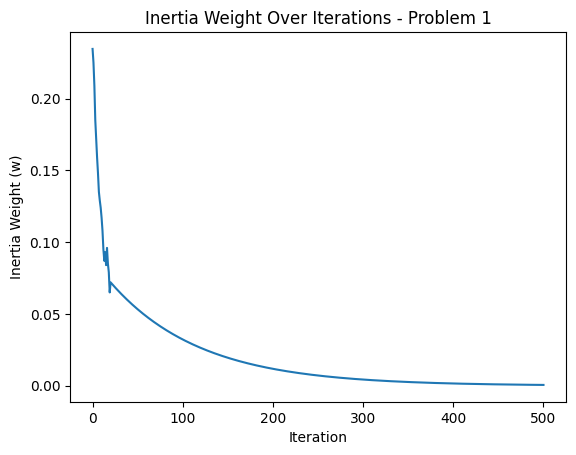

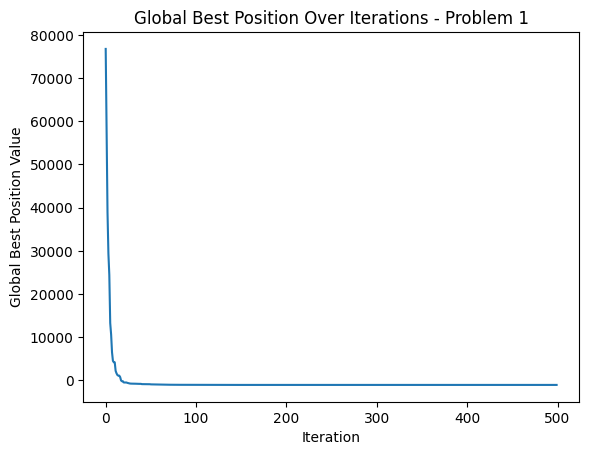




Problem 2 Best Cost: [-701.38987733 -701.42138479 -701.44267798 -701.45747236 -701.48274192
 -701.50090172 -701.52838915 -701.53541853 -701.54587635 -701.57271356
 -701.59712442 -701.60015868 -701.61250293 -701.62809705 -701.64339163
 -701.64339163 -701.65897554 -701.68537665 -701.69262003 -701.69918858
 -701.70714014 -701.71543105 -701.72110351 -701.73268588 -701.73268588
 -701.74201722 -701.75393774 -701.75547483 -701.76253946 -701.76253946
 -701.76253946 -701.76253946 -701.76849535 -701.77658301 -701.79063573
 -701.79063573 -701.79063573 -701.80849824 -701.81798575 -701.81798575
 -701.84421533 -701.84421533 -701.84484365 -701.84484365 -701.84484365
 -701.84484365 -701.85923942 -701.85923942 -701.87462934 -701.88473573
 -701.88552014 -701.88552014 -701.88552014 -701.91407497 -701.94103668
 -701.94103668 -701.94103668 -701.94103668 -701.94103668 -701.95936072
 -701.95936072 -701.95954384 -701.95954384 -701.97364461 -701.97364461
 -701.97987973 -701.98508135 -701.98508135 -701.98508

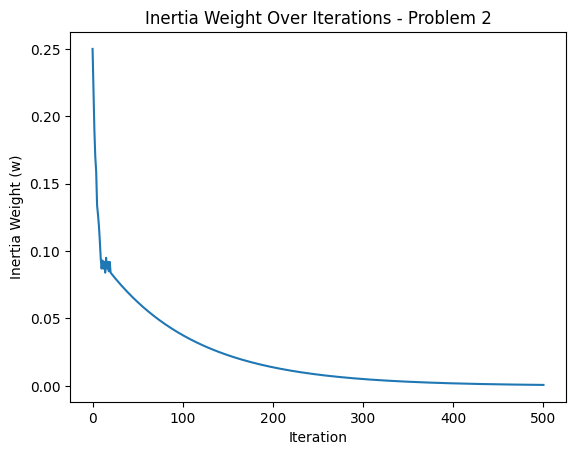

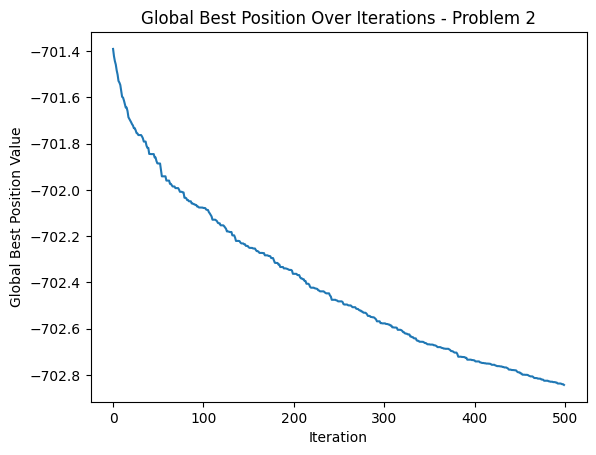




Problem 3 Best Cost: [ 3.76087158e+10  2.62405489e+10  2.33011727e+10  2.05384907e+10
  1.32327953e+10  9.94528224e+09  7.36595258e+09  6.35511866e+09
  6.35511866e+09  5.60174720e+09  3.42673984e+09  3.13650848e+09
  2.82776324e+09  2.38541189e+09  1.87897416e+09  1.79915980e+09
  1.34346542e+09  1.21665209e+09  1.02822442e+09  8.73307207e+08
  8.73307207e+08  8.53420457e+08  6.46991472e+08  5.47381452e+08
  4.96101091e+08  4.23838432e+08  3.81101250e+08  3.81101250e+08
  3.81101250e+08  3.81101250e+08  3.16318232e+08  3.16318232e+08
  2.93810514e+08  2.93810514e+08  2.60979277e+08  2.54717216e+08
  2.30567679e+08  2.28910137e+08  1.87717774e+08  1.45723700e+08
  1.45723700e+08  1.32055050e+08  1.32055050e+08  1.32055050e+08
  9.41394990e+07  9.41394990e+07  8.99081755e+07  8.99081755e+07
  8.99081755e+07  8.99081755e+07  8.78683219e+07  8.42857560e+07
  7.73495912e+07  7.73495912e+07  7.46855569e+07  6.65995227e+07
  6.65995227e+07  6.61458375e+07  6.57777989e+07  5.93949989e+07
 

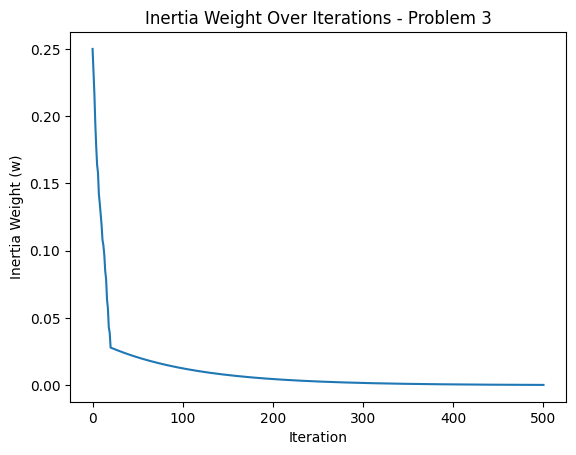

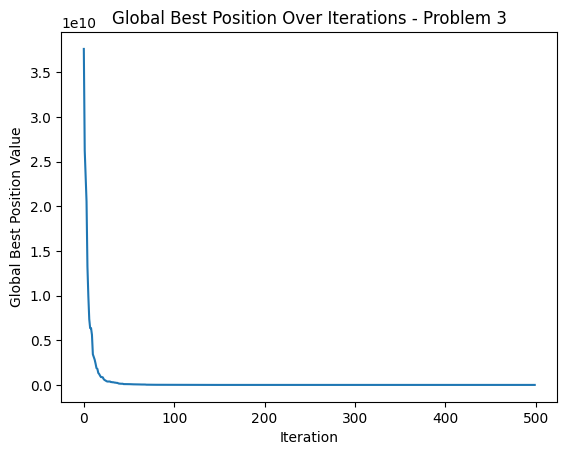




Problem 4 Best Cost: [ 3.01638499e+05  2.53027625e+05  2.06723808e+05  1.75088575e+05
  1.35915013e+05  1.02815826e+05  6.52063480e+04  5.84813401e+04
  5.39965939e+04  4.29965485e+04  3.84014109e+04  3.08458100e+04
  3.08458100e+04  2.37861546e+04  1.94896700e+04  1.52793917e+04
  1.50660628e+04  1.11221166e+04  1.06491649e+04  5.06151554e+03
  5.06151554e+03  5.06151554e+03  5.04075584e+03  4.47665441e+03
  3.79558634e+03  3.30748652e+03  3.30748652e+03  3.30748652e+03
  2.83538655e+03  2.83538655e+03  1.98312748e+03  1.98312748e+03
  1.98312748e+03  1.95721809e+03  1.95721809e+03  1.75860013e+03
  1.38187344e+03  1.33867106e+03  1.12472852e+03  1.12472852e+03
  1.12472852e+03  1.12472852e+03  7.87299329e+02  7.87299329e+02
  6.34646900e+02  6.34646900e+02  6.34646900e+02  6.34646900e+02
  2.44988589e+02  2.44988589e+02  2.44988589e+02  1.25413819e+02
  1.25413819e+02  7.96740535e+01  3.43186495e+01  3.43186495e+01
  3.43186495e+01  3.43186495e+01  3.43186495e+01 -4.76265031e+01
 

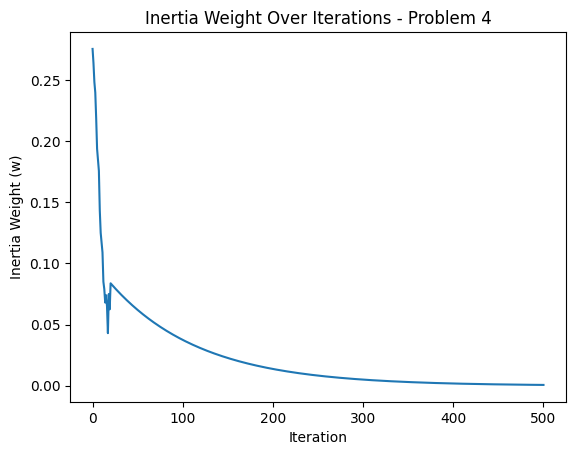

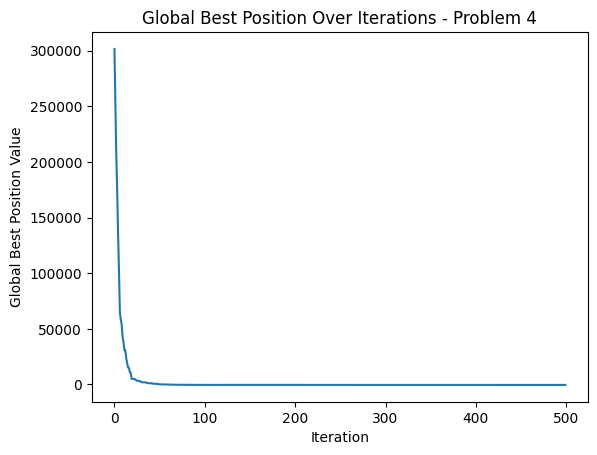




Problem 5 Best Cost: [-334.16988279 -334.20830661 -334.25890001 -334.29157453 -334.35076015
 -334.41208513 -334.44646125 -334.47499937 -334.49621862 -334.51733166
 -334.5579194  -334.56901376 -334.59234074 -334.64298654 -334.64298654
 -334.64298654 -334.65319661 -334.71030887 -334.74706247 -334.74706247
 -334.78743714 -334.78917321 -334.78917321 -334.78917321 -334.79477537
 -334.80178089 -334.81105887 -334.81105887 -334.81286203 -334.81821873
 -334.81821873 -334.84886672 -334.85264513 -334.85590188 -334.85590188
 -334.86764378 -334.87191271 -334.89410782 -334.89410782 -334.89410782
 -334.89410782 -334.89520599 -334.9072591  -334.92067665 -334.92067665
 -334.93795382 -334.93795382 -334.93795382 -334.95460677 -334.96548079
 -334.96548079 -334.98478489 -334.98478489 -335.00051699 -335.00657599
 -335.01291835 -335.01581632 -335.01763009 -335.04956343 -335.04956343
 -335.07081516 -335.07081516 -335.07812957 -335.07812957 -335.10194769
 -335.10194769 -335.10194769 -335.10194769 -335.10386

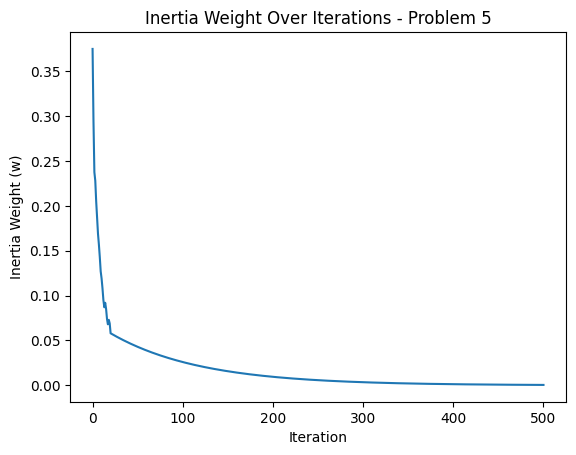

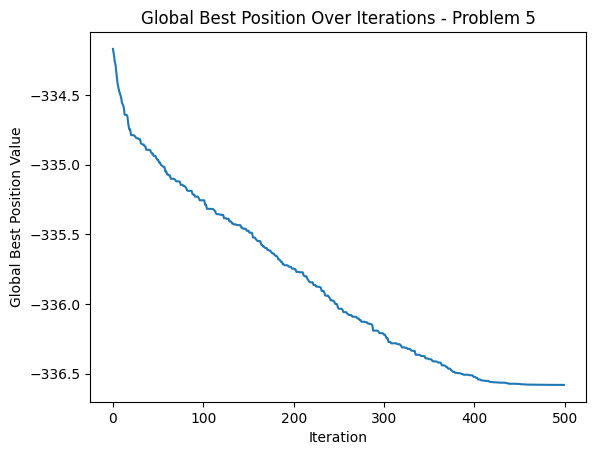




Problem 6 Best Cost: [-183.59219898 -183.63425937 -183.68093271 -183.71367836 -183.76534296
 -183.85813511 -183.89442233 -183.89442233 -183.90724512 -183.92107582
 -183.95364087 -183.96650047 -184.0186284  -184.0186284  -184.02717899
 -184.03046999 -184.03848341 -184.09839968 -184.09839968 -184.09839968
 -184.11359614 -184.11359614 -184.13042446 -184.14251642 -184.15858275
 -184.18606668 -184.2079024  -184.21133746 -184.21919034 -184.22520662
 -184.22520662 -184.22520662 -184.22567744 -184.26188908 -184.26188908
 -184.26188908 -184.26188908 -184.27400355 -184.28245267 -184.28245267
 -184.3104324  -184.3104324  -184.31115242 -184.32506787 -184.32506787
 -184.34309355 -184.34683341 -184.34683341 -184.34740571 -184.34740571
 -184.38652952 -184.38652952 -184.40551849 -184.40551849 -184.40632802
 -184.41287145 -184.41287145 -184.42783982 -184.42783982 -184.42783982
 -184.44826546 -184.44893162 -184.45645288 -184.45645288 -184.46054653
 -184.46054653 -184.48067528 -184.48067528 -184.48599

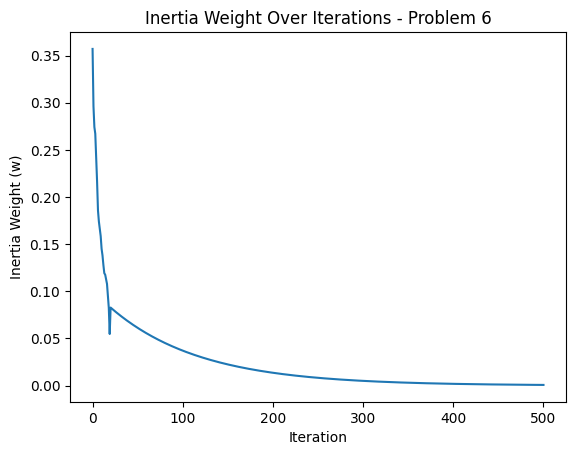

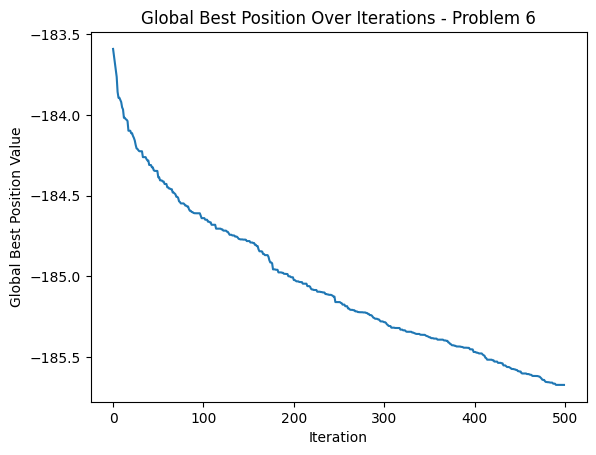




Problem 7 Best Cost: [62778.55591721 52718.98739929 44549.11149752 34235.89569133
 25480.26848103 22302.59593945 18078.42252613 10372.01783808
 10372.01783808 10372.01783808 10372.01783808 10372.01783808
 10372.01783808  9987.16366932  9851.22512632  9335.30179291
  7353.91191627  7353.91191627  7353.91191627  6916.44319211
  6899.1788807   6639.95940184  5282.36709916  5282.36709916
  5282.36709916  5282.36709916  5282.36709916  5282.36709916
  5012.46068973  4906.77615227  4199.00157163  3527.08961046
  3068.3936427   3024.01132158  2560.96624771  2560.96624771
  2288.30147063  2288.30147063  2288.30147063  2149.66550656
  2135.78318001  2135.78318001  2011.96819666  2011.96819666
  2011.96819666  1989.17788894  1972.71488179  1936.5446856
  1936.5446856   1892.00417634  1840.74436028  1840.74436028
  1670.17561522  1468.5966462   1468.5966462   1162.1096863
  1162.1096863   1024.64762346   999.57985723   536.16765928
   536.16765928   351.82286503   351.82286503   276.01285479
  

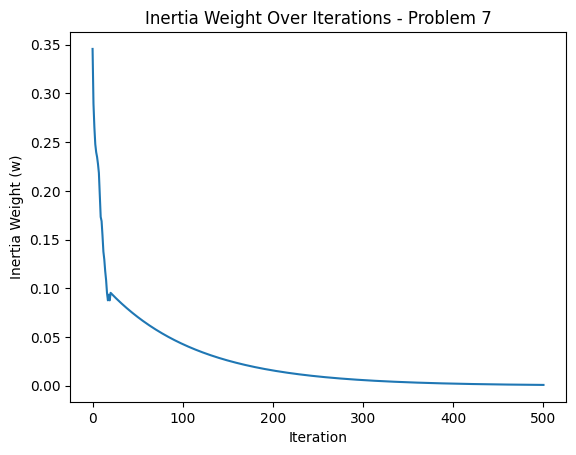

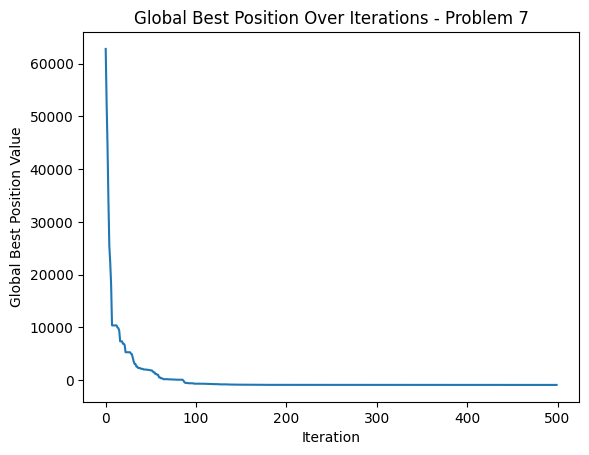




Problem 8 Best Cost: [ 5.35277332e+04  3.72693199e+04  3.59900723e+04  2.96025160e+04
  2.01430428e+04  2.01430428e+04  1.96347307e+04  1.83545526e+04
  1.83545526e+04  1.83545526e+04  1.67612994e+04  1.67612994e+04
  1.67612994e+04  1.67612994e+04  1.67612994e+04  1.67612994e+04
  1.55324305e+04  1.52104061e+04  1.52104061e+04  1.52104061e+04
  1.52104061e+04  1.29986416e+04  1.29986416e+04  1.23429443e+04
  1.23429443e+04  1.06298978e+04  1.06298978e+04  1.06298978e+04
  1.06298978e+04  1.06298978e+04  1.06298978e+04  9.20924967e+03
  8.31008712e+03  8.31008712e+03  8.10517467e+03  8.10517467e+03
  8.10517467e+03  8.10517467e+03  8.10517467e+03  8.10517467e+03
  8.10517467e+03  8.10517467e+03  8.10517467e+03  8.10517467e+03
  8.10517467e+03  8.07360734e+03  8.07360734e+03  6.51395600e+03
  6.51395600e+03  6.51395600e+03  6.48616965e+03  6.48616965e+03
  6.26729400e+03  5.72648154e+03  4.26277487e+03  4.26277487e+03
  4.26277487e+03  3.37364637e+03  3.37364637e+03  3.34588778e+03
 

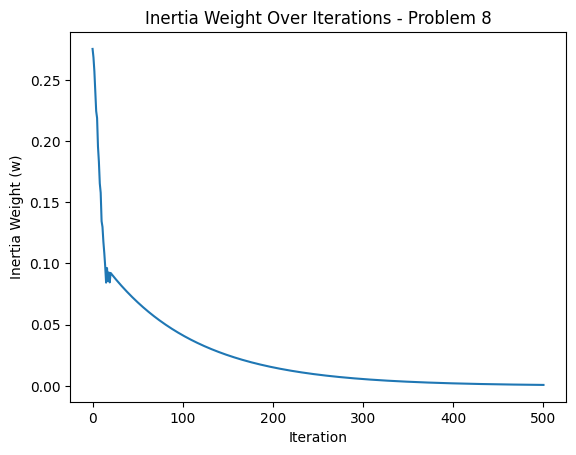

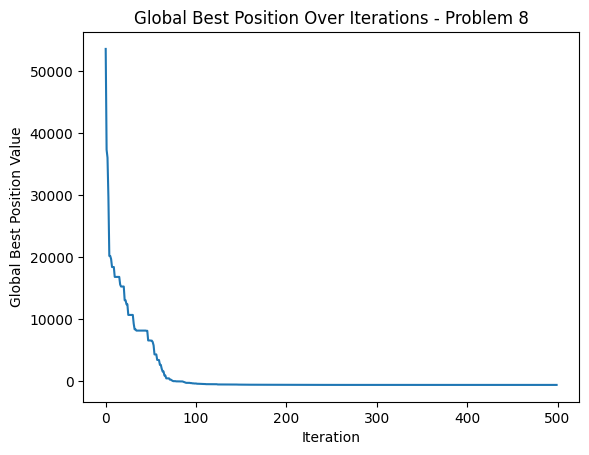




Problem 9 Best Cost: [ 1.99035639e+05  7.63961809e+04  7.63961809e+04  7.63961809e+04
  3.92081081e+04  3.92081081e+04  3.92081081e+04  3.92081081e+04
  3.92081081e+04  3.92081081e+04  3.92081081e+04  3.92081081e+04
  3.92081081e+04  3.92081081e+04  3.92081081e+04  3.92081081e+04
  3.92081081e+04  3.19343134e+04  3.19343134e+04  3.19343134e+04
  3.19343134e+04  2.95219251e+04  2.95219251e+04  1.99279058e+04
  1.65631062e+04  1.65631062e+04  1.65631062e+04  1.65631062e+04
  1.65631062e+04  1.65631062e+04  1.65631062e+04  1.65631062e+04
  1.50085445e+04  1.50085445e+04  1.20107816e+04  1.20107816e+04
  9.16311520e+03  9.16311520e+03  9.16311520e+03  9.16311520e+03
  9.16311520e+03  9.16311520e+03  9.16311520e+03  9.16311520e+03
  8.76994354e+03  8.76994354e+03  6.04018134e+03  6.04018134e+03
  6.04018134e+03  5.72745648e+03  5.72745648e+03  5.72745648e+03
  5.72745648e+03  4.27559113e+03  4.27559113e+03  4.27559113e+03
  4.27559113e+03  4.27559113e+03  2.28104238e+03  2.28104238e+03
 

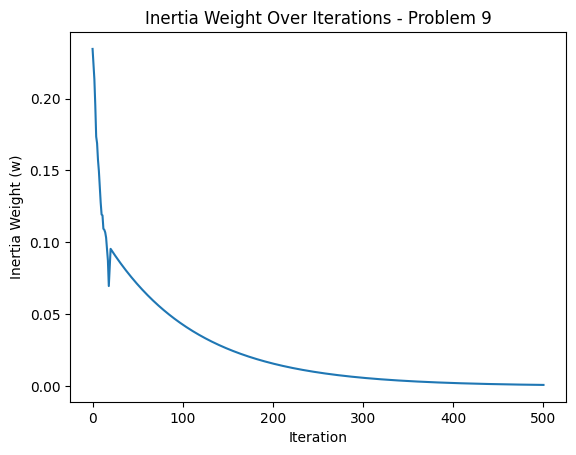

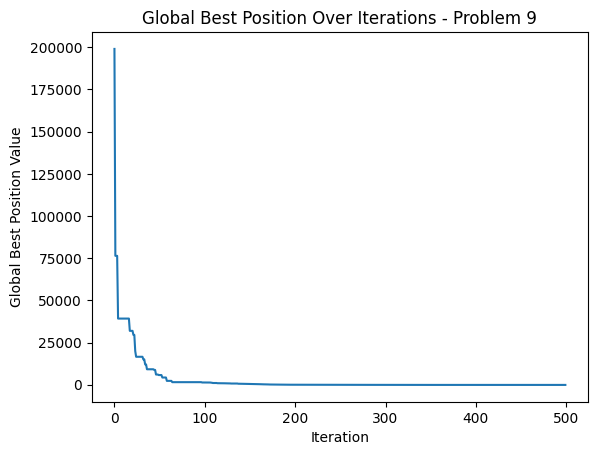




Problem 10 Best Cost: [55442.76557801 40355.47126353 38816.75332083 24889.14229959
 24889.14229959 24889.14229959 24889.14229959 24889.14229959
 24889.14229959 24889.14229959 24123.68478767 22866.21596426
 22866.21596426 19037.44951034 18675.76660695 18380.08881948
 16878.48759489 15096.69148815 10734.75694389 10734.75694389
 10734.75694389 10734.75694389  9820.13924719  9820.13924719
  8113.39420952  8113.39420952  7910.633252    7910.633252
  7694.09638661  7694.09638661  7694.09638661  7694.09638661
  7261.11368614  7261.11368614  7261.11368614  7261.11368614
  7261.11368614  6365.1017596   5604.7798185   5604.7798185
  5604.7798185   5604.7798185   5604.7798185   5604.7798185
  4929.26009137  4923.2381255   4923.2381255   4923.2381255
  4923.2381255   4923.2381255   4923.2381255   4844.29714932
  4844.29714932  4452.25495227  4452.25495227  4452.25495227
  4187.74451739  4187.74451739  4187.74451739  4187.74451739
  4187.74451739  4187.74451739  4187.74451739  4187.74451739
  39

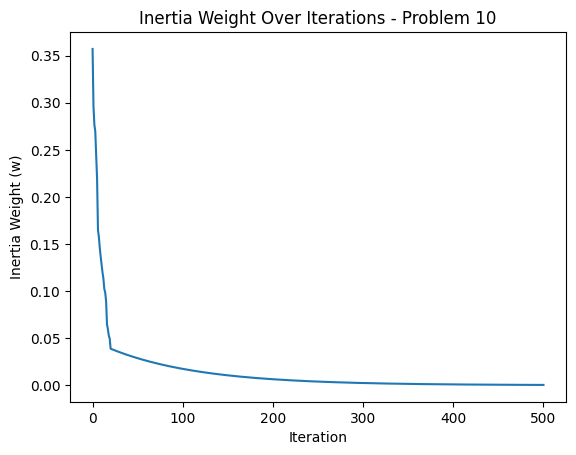

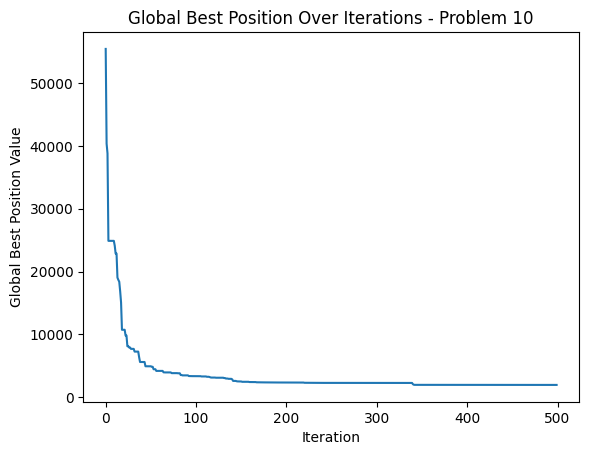




Problem 11 Best Cost: [47445.300208   46416.91445595 34307.72766669 31026.17938184
 26663.99180615 20292.63100263 14317.82198783 14317.82198783
 14317.82198783 14317.82198783 10166.1991662   9566.28571555
  8577.29830148  7714.75760234  7714.75760234  7423.44689556
  6379.08546122  6379.08546122  6379.08546122  6379.08546122
  6379.08546122  6379.08546122  6051.12982696  5317.19586133
  5317.19586133  4464.11975887  4464.11975887  3684.53473102
  3684.53473102  3684.53473102  3684.53473102  3684.53473102
  3684.53473102  3544.66911676  3461.59959279  3153.22069472
  3039.97095822  2330.18953661  2330.18953661  2330.18953661
  2330.18953661  2330.18953661  2237.08356488  2084.75638159
  2084.75638159  2084.75638159  2084.75638159  2084.75638159
  2084.75638159  1924.10901045  1924.10901045  1924.10901045
  1924.10901045  1924.10901045  1924.10901045  1924.10901045
  1907.47533261  1907.47533261  1902.78250726  1902.78250726
  1902.78250726  1819.64379211  1819.64379211  1790.24277172

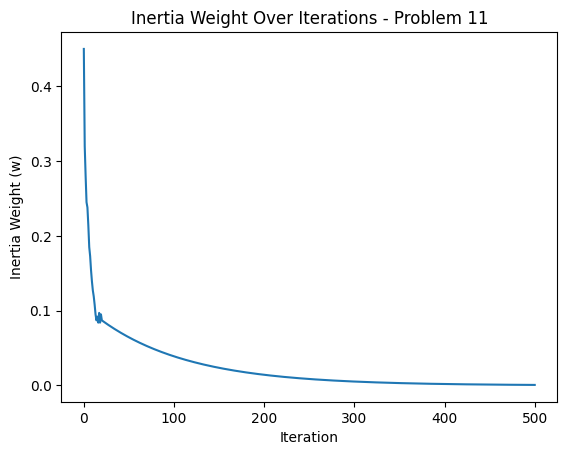

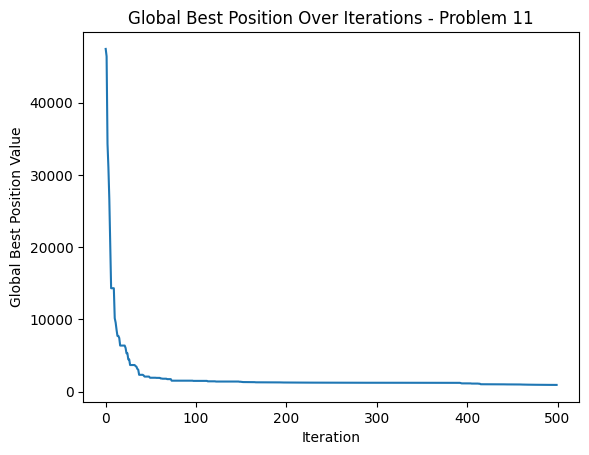




Problem 12 Best Cost: [51690.72829265 50066.64119276 34007.49090048 34007.49090048
 30736.84970589 27115.71158727 27115.71158727 27115.71158727
 27115.71158727 25544.28899939 25544.28899939 21016.37966006
 21016.37966006 21016.37966006 21016.37966006 21016.37966006
 18950.61755313 18268.14447722 17159.88610849 17159.88610849
 17159.88610849 17107.30439973 17107.30439973 16648.82666314
 16648.82666314 16648.82666314 15577.43824825 15535.04581436
 13688.50084971 13192.60967501 13192.60967501 13192.60967501
 11708.23870131 11708.23870131 11708.23870131 11708.23870131
 11708.23870131 11708.23870131 11381.73497252 11381.73497252
 10441.2121746  10441.2121746  10441.2121746  10441.2121746
 10441.2121746  10441.2121746   9958.4906306   9958.4906306
  9958.4906306   9958.4906306   9958.4906306   9958.4906306
  9958.4906306   9933.72639704  9933.72639704  9485.58652129
  9485.58652129  9485.58652129  9485.58652129  9485.58652129
  9485.58652129  9485.58652129  9485.58652129  9485.58652129
  

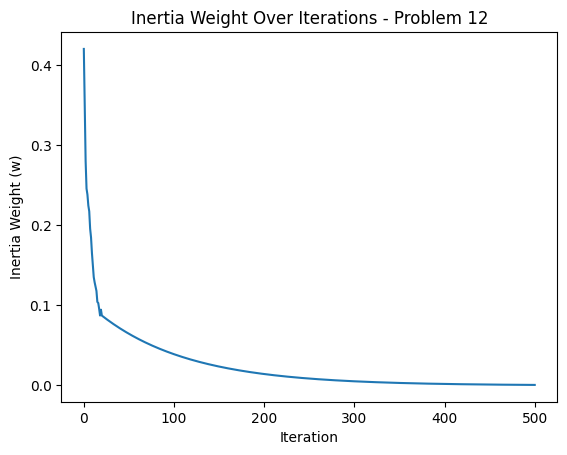

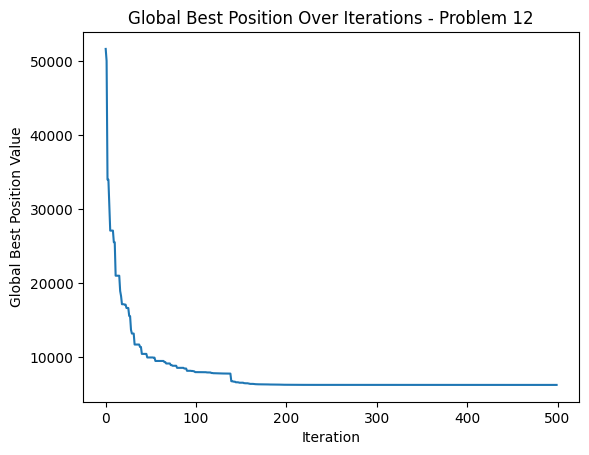




Problem 13 Best Cost: [279979.02117432 121126.94393131 121126.94393131 121126.94393131
 121126.94393131 121126.94393131 121126.94393131 121126.94393131
 121126.94393131 121126.94393131 102438.56916122 102438.56916122
  89588.02767002  89588.02767002  89588.02767002  67734.89060733
  62952.28925945  62952.28925945  62952.28925945  62952.28925945
  62952.28925945  62952.28925945  62952.28925945  62952.28925945
  62952.28925945  62952.28925945  62952.28925945  62952.28925945
  62952.28925945  62952.28925945  62952.28925945  62952.28925945
  62952.28925945  62952.28925945  62952.28925945  62952.28925945
  62952.28925945  62952.28925945  54967.12751022  54967.12751022
  54967.12751022  54967.12751022  54967.12751022  54967.12751022
  54967.12751022  54967.12751022  54967.12751022  54967.12751022
  54967.12751022  54967.12751022  54967.12751022  54967.12751022
  54967.12751022  54967.12751022  54967.12751022  54967.12751022
  54967.12751022  54967.12751022  54967.12751022  54967.12751022


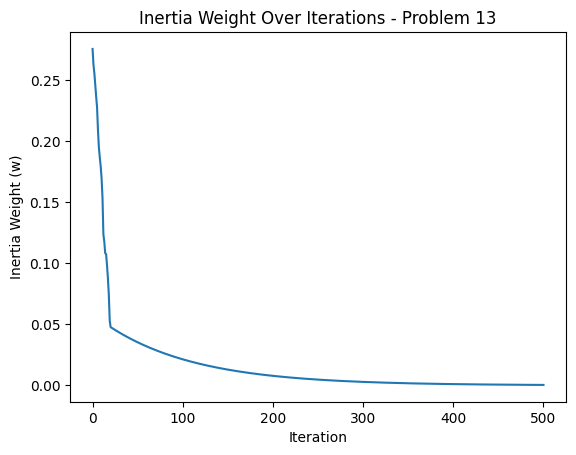

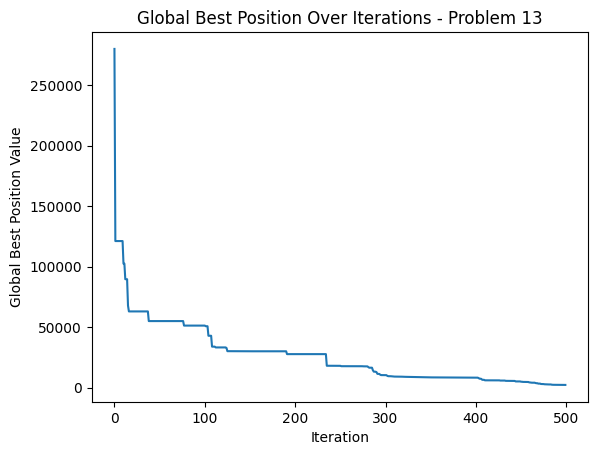




Problem 14 Best Cost: [35753.07126822 28299.08858988 20834.81588089 20392.99555909
 20392.99555909 20392.99555909 20392.99555909 20392.99555909
 20392.99555909 20392.99555909 20392.99555909 18492.2283964
 18492.2283964  17076.25146095 17076.25146095 17076.25146095
 16356.34882273 16356.34882273 16356.34882273 16356.34882273
 16356.34882273 16356.34882273 16327.32016018 16327.32016018
 15317.03802529 15317.03802529 15317.03802529 15317.03802529
 15317.03802529 15317.03802529 15317.03802529 15317.03802529
 15317.03802529 15317.03802529 14988.4103332  14955.05338191
 13603.26169554 13603.26169554 13603.26169554 13603.26169554
 13603.26169554 13603.26169554 13603.26169554 13603.26169554
 13603.26169554 13603.26169554 13603.26169554 13603.26169554
 13603.26169554 13603.26169554 13603.26169554 13603.26169554
 13603.26169554 13603.26169554 13603.26169554 12798.8087313
 12798.8087313  12798.8087313  12798.8087313  12798.8087313
 12798.8087313  12798.8087313  12798.8087313  12798.8087313
 12

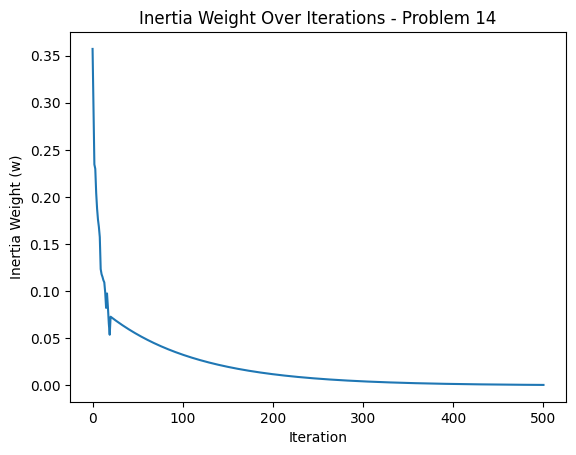

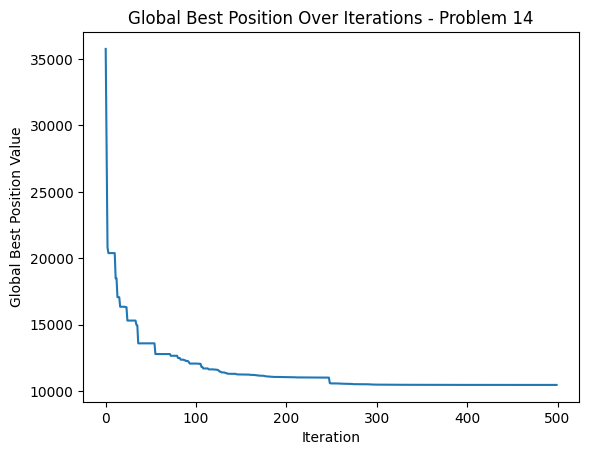




Problem 15 Best Cost: [-226.0518058  -226.0518058  -226.0518058  -226.0518058  -226.0518058
 -226.0518058  -226.0518058  -226.0518058  -226.0518058  -226.0518058
 -226.0518058  -227.17407992 -227.17407992 -227.17407992 -227.17407992
 -227.17407992 -227.17407992 -227.17407992 -227.17407992 -227.22484212
 -227.22484212 -227.22484212 -227.25167334 -227.25167334 -227.25167334
 -227.25167334 -227.25167334 -227.25167334 -227.37986503 -227.37986503
 -227.37986503 -227.37986503 -227.37986503 -227.37986503 -227.37986503
 -227.4159509  -227.4159509  -227.4159509  -227.54024767 -227.54024767
 -227.54024767 -227.54024767 -227.56364726 -227.56364726 -227.58222232
 -227.59692392 -227.59692392 -227.62302697 -227.62302697 -227.62302697
 -227.63587689 -227.63587689 -227.63587689 -227.63587689 -227.63587689
 -227.63587689 -227.68958172 -227.68958172 -227.68958172 -227.68958172
 -227.68958172 -227.68958172 -227.68958172 -227.68958172 -227.70092852
 -227.70092852 -227.70092852 -227.70092852 -227.700928

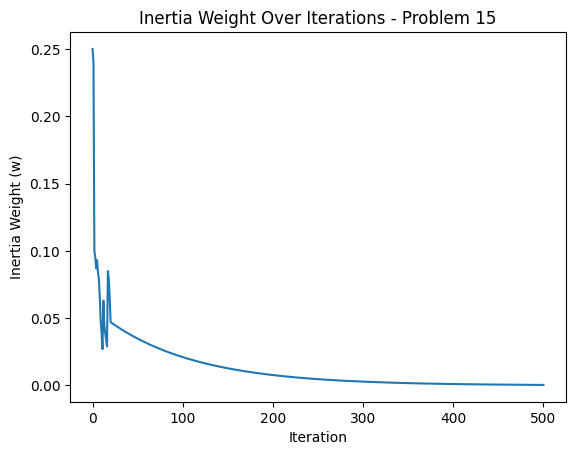

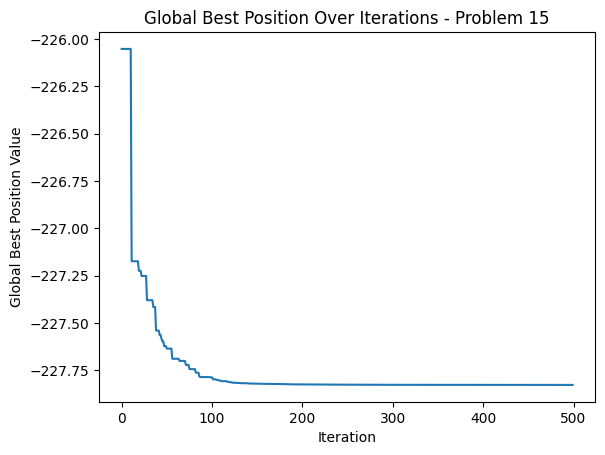




Problem 16 Best Cost: [ 6.72276293e+04  5.22292706e+04  4.51657771e+04  3.53968822e+04
  2.91685069e+04  1.94133406e+04  1.14950544e+04  1.11026684e+04
  9.55990835e+03  9.17552113e+03  4.86003343e+03  4.55627195e+01
  4.55627195e+01 -2.76021550e+02 -2.76021550e+02 -1.54872530e+03
 -1.78839933e+03 -1.78839933e+03 -2.42430720e+03 -2.84233403e+03
 -2.84233403e+03 -3.13265424e+03 -3.22455627e+03 -3.41804682e+03
 -3.41804682e+03 -3.51052538e+03 -3.72763908e+03 -3.72763908e+03
 -3.72763908e+03 -3.84074596e+03 -3.84074596e+03 -3.84074596e+03
 -3.85718869e+03 -3.90121723e+03 -3.90121723e+03 -3.92657730e+03
 -3.99606975e+03 -4.03161493e+03 -4.03161493e+03 -4.03161493e+03
 -4.04907224e+03 -4.06710319e+03 -4.06710319e+03 -4.08656152e+03
 -4.11507429e+03 -4.11507429e+03 -4.12313994e+03 -4.15584184e+03
 -4.18660289e+03 -4.18660289e+03 -4.18660289e+03 -4.19226546e+03
 -4.23088715e+03 -4.23088715e+03 -4.24972564e+03 -4.26767865e+03
 -4.26767865e+03 -4.26767865e+03 -4.27051582e+03 -4.27051582e+03


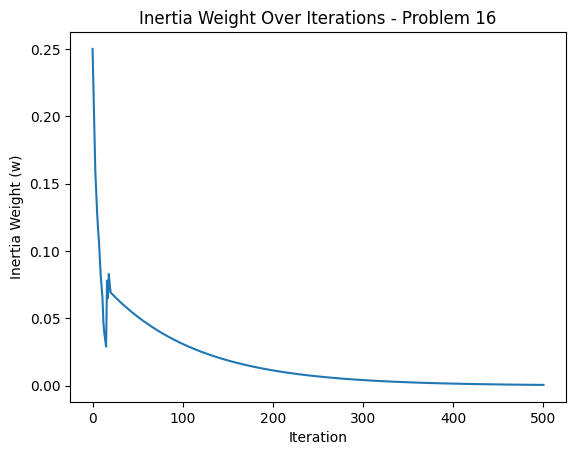

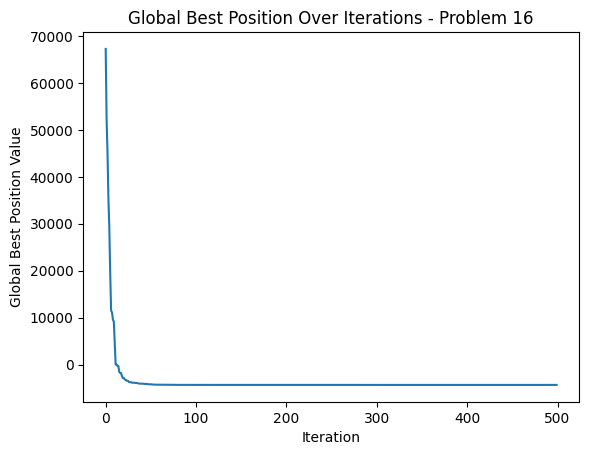




Problem 17 Best Cost: [ 2.70114377e+06  2.11205107e+06  1.51236214e+06  1.30037241e+06
  1.00094264e+06  7.53229561e+05  4.63128990e+05  4.54861078e+05
  3.28922792e+05  2.17598881e+05  2.08847424e+05  2.08455840e+05
  1.55787541e+05  1.54960077e+05  1.08657925e+05  8.78425100e+04
  7.31586393e+04  5.62694170e+04  5.55141196e+04  5.16930649e+04
  4.76314348e+04  4.57210442e+04  3.88492197e+04  3.51035465e+04
  3.26152306e+04  3.26152306e+04  3.26152306e+04  2.71841654e+04
  2.62498001e+04  2.62498001e+04  2.46314968e+04  2.46314968e+04
  2.46314968e+04  1.66984262e+04  1.66984262e+04  1.66984262e+04
  1.66984262e+04  1.40886675e+04  1.40886675e+04  1.40886675e+04
  1.20929572e+04  1.20929572e+04  1.20929572e+04  1.09945001e+04
  1.09945001e+04  1.09945001e+04  1.07562145e+04  1.04639725e+04
  1.01847461e+04  1.00011579e+04  9.59369795e+03  8.92403820e+03
  8.92403820e+03  8.13133568e+03  7.90387369e+03  6.91556284e+03
  6.74150175e+03  6.07838446e+03  5.58691161e+03  5.09527090e+03


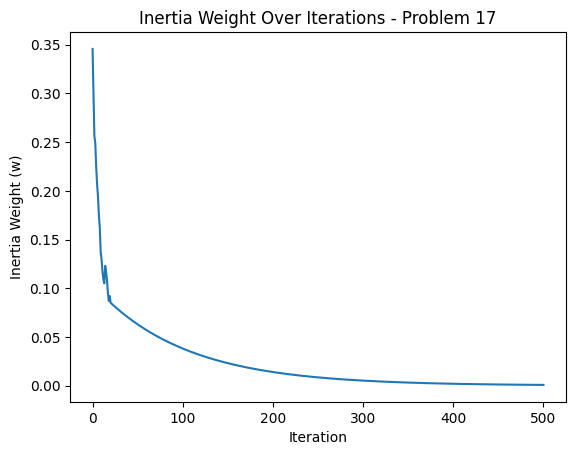

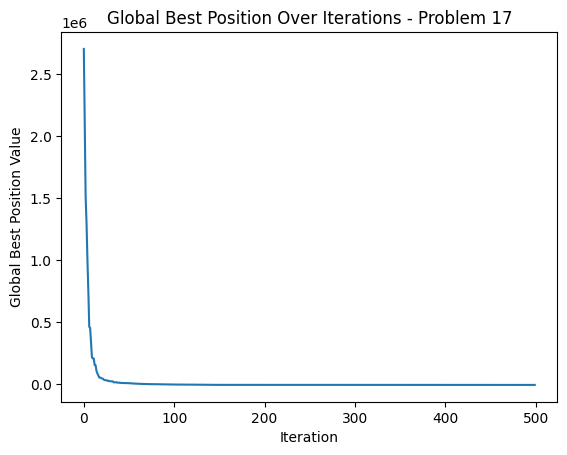




Problem 18 Best Cost: [65382.21879544 52162.92384684 29813.68504268 22983.6643084
 22983.6643084  19077.65512594 15466.91863955 13176.88213737
  9696.71081123  7386.19523522  7386.19523522  5464.72655228
  4992.33025016  4476.03175984  4476.03175984  4339.53808596
  2442.15548458  2442.15548458  2442.15548458  2442.15548458
  2442.15548458  2442.15548458  2442.15548458  1772.74458472
  1772.74458472  1527.96842475  1527.96842475   790.07883248
   790.07883248   790.07883248   790.07883248   790.07883248
   790.07883248   790.07883248   790.07883248   790.07883248
   790.07883248   790.07883248   790.07883248   790.07883248
   790.07883248   790.07883248   790.07883248   790.07883248
   790.07883248   790.07883248   790.07883248   790.07883248
   790.07883248   772.88073572   772.88073572   600.57652326
   600.57652326   439.19213848   439.19213848   199.36355558
   199.36355558   199.36355558   199.36355558    92.74446022
  -474.68996981  -474.68996981  -513.49941985  -513.49941985


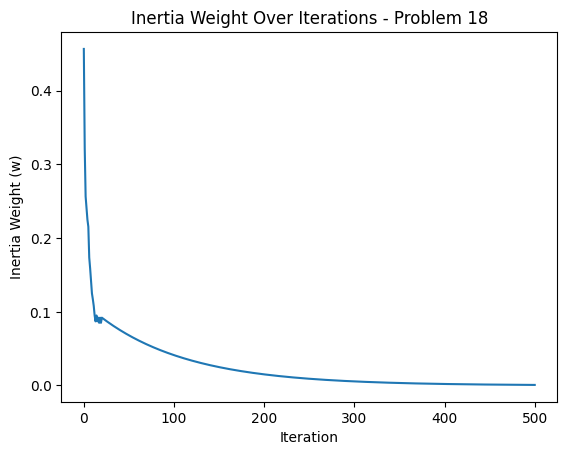

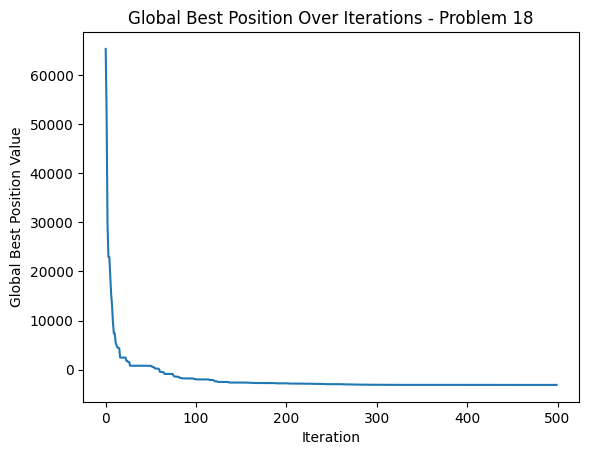




Problem 19 Best Cost: [71195.68396257 37116.22052231 37116.22052231 19991.12715463
 19991.12715463 19991.12715463 19991.12715463 19991.12715463
 19991.12715463 19991.12715463 18527.26027964 18347.40145547
 18347.40145547 15722.73633761 15722.73633761 15722.73633761
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 15675.08619878 15675.08619878 15675.08619878 15675.08619878
 12607.71608167 12607.71608167 12607.71608167 12607.71608167
 12607.71608167 12256.87842109 12256.87842109 12256.87842109
 12256.87842109 12256.87842109 12256.87842109 12256.87842109
 12256.87842109 12256.87842109 12256.87842109 12256.87842109
 12256.87842109 12256.87842109 12256.87842109 10802.82633468

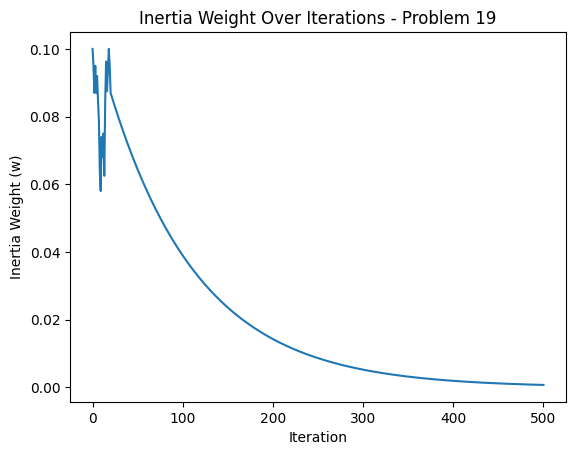

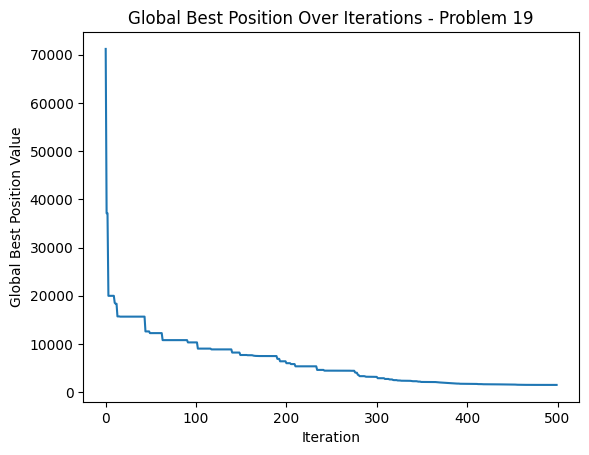




Problem 20 Best Cost: [-83.41030952 -83.41030952 -83.44257667 -83.75613712 -83.75613712
 -83.75613712 -83.75613712 -83.75613712 -83.75613712 -84.33908762
 -84.33908762 -84.33908762 -84.33908762 -84.33908762 -84.33908762
 -84.33908762 -84.33908762 -84.33908762 -84.33908762 -84.57972538
 -84.57972538 -84.73250941 -84.73250941 -84.73250941 -84.73250941
 -84.73547591 -84.73547591 -84.73547591 -84.73547591 -84.73547591
 -84.73547591 -85.29852834 -85.29852834 -85.29852834 -85.29852834
 -85.29852834 -85.29852834 -85.29852834 -85.29852834 -85.29852834
 -85.4925225  -85.4925225  -85.4925225  -85.4925225  -85.4925225
 -85.4925225  -85.65752089 -85.65752089 -85.65752089 -85.65752089
 -85.75954657 -85.75954657 -85.75954657 -85.75954657 -85.75954657
 -85.75954657 -85.75954657 -85.75954657 -85.80575669 -85.80764385
 -85.92988559 -85.92988559 -85.92988559 -85.92988559 -85.92988559
 -85.92988559 -85.92988559 -85.99911485 -85.99911485 -86.02377962
 -86.06360897 -86.06901873 -86.07752375 -86.07752375

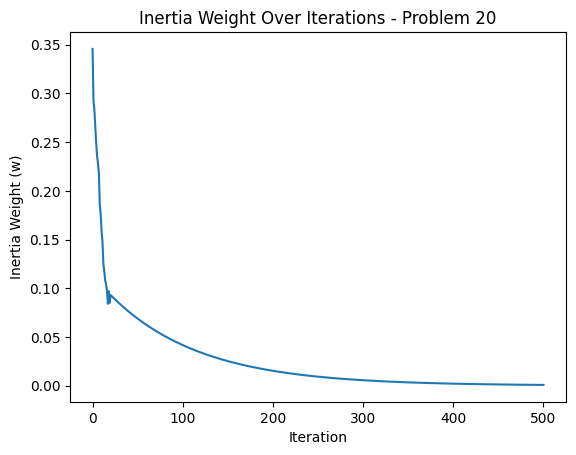

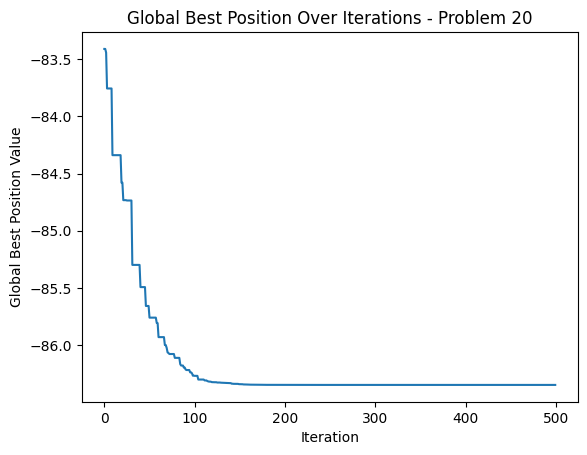




Problem 21 Best Cost: [145.31353917  92.27315419  46.79747017  22.49420846  12.79004657
  12.79004657   5.5541155   -5.85110111  -5.85110111  -6.55899737
  -8.52048891 -11.30059451 -11.30059451 -11.30059451 -11.30059451
 -18.15174402 -19.20148378 -20.63035796 -20.70118476 -23.57642603
 -23.57642603 -23.57642603 -23.57642603 -23.57642603 -25.42348649
 -26.67358495 -26.67358495 -27.50696652 -27.50696652 -27.50696652
 -28.97811186 -29.86197386 -30.20728758 -30.78703902 -32.73938138
 -32.73938138 -32.73938138 -32.73938138 -32.73938138 -32.75096079
 -34.63358264 -36.24991506 -37.82193548 -37.82193548 -37.82193548
 -37.82193548 -38.198951   -38.198951   -38.20159614 -38.20159614
 -38.20159614 -38.41059711 -38.41059711 -38.41059711 -38.76571698
 -38.76571698 -38.76571698 -39.4036744  -39.4036744  -39.4036744
 -39.53534678 -39.53534678 -39.53534678 -39.67904758 -39.69468127
 -39.69468127 -39.69468127 -40.2967309  -40.2967309  -40.2967309
 -40.50722355 -40.50722355 -40.50722355 -40.56806189 

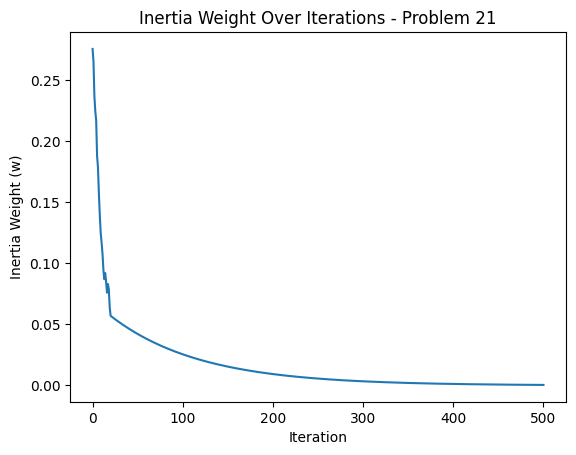

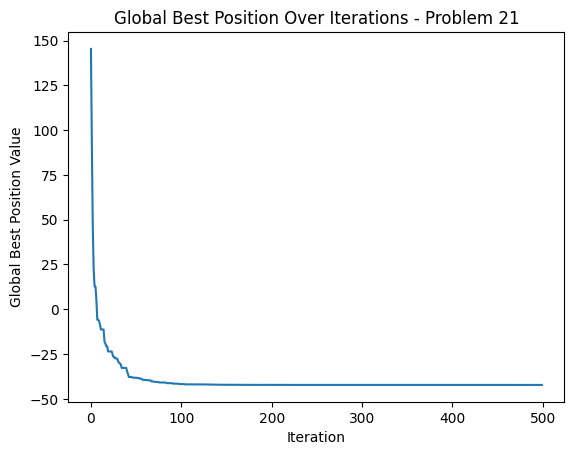




Problem 22 Best Cost: [233284.37602012 233284.37602012 230282.75519342 215114.19648875
 135113.06958038 135113.06958038 135113.06958038 135113.06958038
 135113.06958038 135113.06958038 135113.06958038 135113.06958038
 135113.06958038 135113.06958038 135113.06958038 135113.06958038
 135113.06958038 135113.06958038 123518.23808406 123518.23808406
 123518.23808406 123518.23808406 123518.23808406 121843.98316595
 121843.98316595 121843.98316595 121843.98316595 112656.87353336
 112656.87353336 105862.1468827  105862.1468827  105862.1468827
 105862.1468827  105862.1468827  105862.1468827  105862.1468827
 105862.1468827   94366.08868588  94366.08868588  94366.08868588
  94366.08868588  94366.08868588  94366.08868588  88673.01875051
  88673.01875051  88673.01875051  88673.01875051  88673.01875051
  88673.01875051  86820.55948702  86820.55948702  85803.85243085
  85803.85243085  85803.85243085  85506.22699041  85506.22699041
  85506.22699041  85506.22699041  85506.22699041  85506.22699041
  

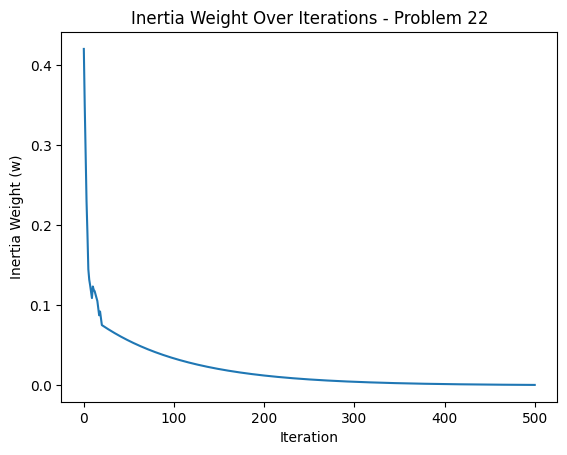

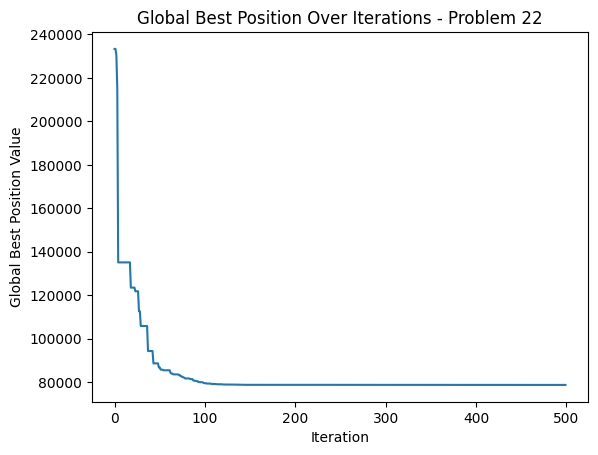




Problem 23 Best Cost: [-18.49729066 -29.86476595 -29.86476595 -34.38734945 -41.14628687
 -41.14628687 -41.14628687 -41.14628687 -41.22858136 -41.22858136
 -42.48931264 -42.48931264 -42.48931264 -42.48931264 -42.48931264
 -42.48931264 -42.48931264 -42.48931264 -42.48931264 -42.48931264
 -42.48931264 -42.48931264 -42.48931264 -42.5733594  -42.5733594
 -42.5733594  -45.05574935 -45.58423082 -45.80608598 -45.80608598
 -45.88191404 -46.08111007 -46.08111007 -46.59456508 -47.56056916
 -51.91543021 -51.91543021 -51.91543021 -51.91543021 -51.91543021
 -51.91543021 -51.91543021 -52.0653524  -52.0653524  -52.0653524
 -52.0653524  -52.0653524  -52.0653524  -52.0653524  -52.31136058
 -52.31136058 -52.77387818 -52.77387818 -52.77387818 -52.95743756
 -52.95743756 -52.95743756 -52.95743756 -52.95743756 -52.95743756
 -55.39596555 -55.39596555 -55.39596555 -55.39596555 -55.39596555
 -55.39596555 -55.39596555 -55.39596555 -55.39596555 -55.39596555
 -56.27036963 -56.28699513 -56.28699513 -56.28699513 

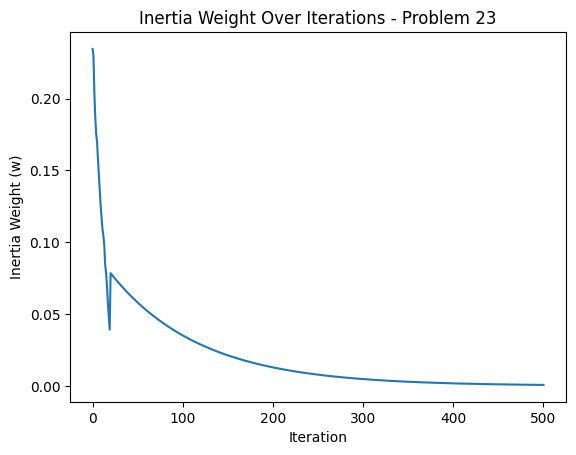

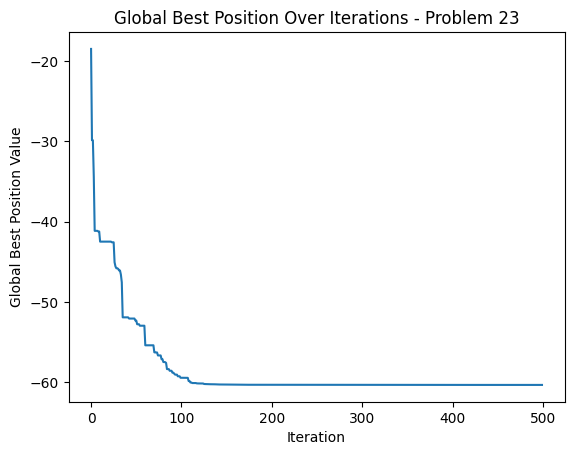




Problem 24 Best Cost: [141.47955602 114.29181514 114.29181514 102.24103569 102.24103569
  96.54903402  96.54903402  92.02395117  92.02395117  87.94480773
  82.67709269  73.30617283  73.30617283  73.30617283  73.30617283
  73.30617283  73.30617283  71.97804414  69.47655852  69.47655852
  69.47655852  69.47655852  69.47655852  69.47655852  69.47655852
  66.87787092  63.85615832  63.85615832  63.85615832  63.85615832
  63.85615832  63.85615832  63.85615832  63.85615832  63.85615832
  63.85615832  63.85615832  63.85615832  63.85615832  62.7685212
  62.28807691  61.7297293   61.7297293   58.19120742  58.19120742
  57.07470654  57.07470654  57.07470654  57.07470654  57.07470654
  57.07470654  57.07470654  57.07470654  55.72067192  55.30916551
  55.30916551  55.30916551  55.30916551  55.30916551  55.30916551
  54.5007595   53.99011096  53.99011096  53.99011096  53.99011096
  53.99011096  53.69554451  53.69554451  53.69554451  53.26436187
  53.26436187  53.26436187  53.26436187  52.8110438 

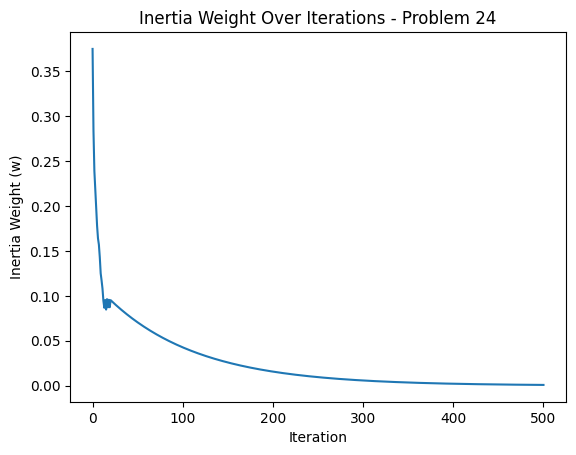

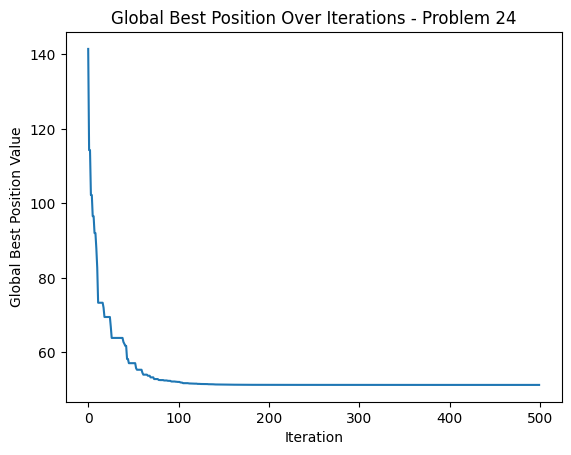

In [25]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [26]:
print('nice')

nice


In [27]:
print('almost complete')

almost complete


In [28]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [29]:
print('ok')

ok
